The purpose of this notebook is to explore the - Predicting Housing Prices
Dataset from Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
and understand the relationship between the features.

Version history: Dataexploration_PCA_VisualAnalysis has the following analysis and learning.

- Missing value detection in the given dataset
- outlier detection
- understanding the features of the dataset
- understanding potential predictors in the dataset through visual analysis and PCA
- Understanding data spread using PCA, identifying the major players that impact models
- Understand which of the categorical features are impacting the SalePrice
- Dimensionality reduction - Finalizing the important quantitative and categorical features for implementing the   models

In [4]:
##importing libraries
import pandas as pd
import numpy as np

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
#scikit
from sklearn import preprocessing
#plot point label format
from adjustText import adjust_text
#principal components Analysis
from sklearn.decomposition import PCA    
from pandas.plotting import scatter_matrix
# clustering
from sklearn.cluster import KMeans
#Silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt  #pyplot
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
## Import the training data to explore the features

In [6]:
df_in = pd.read_csv('train.csv')

In [7]:
df_in.shape

(1460, 81)

In [8]:
df_in.head(100)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1          60       RL         65.0     8450   Pave   NaN      Reg   
1     2          20       RL         80.0     9600   Pave   NaN      Reg   
2     3          60       RL         68.0    11250   Pave   NaN      IR1   
3     4          70       RL         60.0     9550   Pave   NaN      IR1   
4     5          60       RL         84.0    14260   Pave   NaN      IR1   
..  ...         ...      ...          ...      ...    ...   ...      ...   
95   96          60       RL          NaN     9765   Pave   NaN      IR2   
96   97          20       RL         78.0    10264   Pave   NaN      IR1   
97   98          20       RL         73.0    10921   Pave   NaN      Reg   
98   99          30       RL         85.0    10625   Pave   NaN      Reg   
99  100          20       RL         77.0     9320   Pave   NaN      IR1   

   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
0          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
2          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
3          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
4          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
..         ...       ...  ...      ...    ...   ...         ...     ...   
95         Lvl    AllPub  ...        0    NaN   NaN        Shed     480   
96         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
97         HLS    AllPub  ...        0    NaN   NaN         NaN       0   
98         Lvl    AllPub  ...        0    NaN   NaN        Shed     400   
99         Lvl    AllPub  ...        0    NaN   NaN        Shed     400   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       2   2008        WD         Normal     208500  
1       5   2007        WD         Normal     181500  
2       9   2008        WD         Normal     223500  
3       2   2006        WD        Abnorml     140000  
4      12   2008        WD         Normal     250000  
..    ...    ...       ...            ...        ...  
95      4   2009        WD         Normal     185000  
96      8   2006        WD         Normal     214000  
97      5   2007        WD         Normal      94750  
98      5   2010       COD        Abnorml      83000  
99      1   2010        WD         Normal     128950  

[100 rows x 81 columns]

## Understanding the columns

In [9]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

MSSubClass: Identifies the type of dwelling involved in the sale.	


MSZoning: Identifies the general zoning classification of the sale.
		
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property
       	
Alley: Type of alley access to property

		
LotShape: General shape of property
       
LandContour: Flatness of the property
		
Utilities: Type of utilities available	
	
LotConfig: Lot configuration

LandSlope: Slope of property
		
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
Condition2: Proximity to various conditions (if more than one is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Rates the overall material and finish of the house
	
OverallCond: Rates the overall condition of the house
	
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof
		
RoofMatl: Roof material

Exterior1st: Exterior covering on house
	
Exterior2nd: Exterior covering on house (if more than one material)
	
MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
				
ExterCond: Evaluates the present condition of the material on the exterior
		
Foundation: Type of foundation
	
BsmtQual: Evaluates the height of the basement
		
BsmtCond: Evaluates the general condition of the basement

BsmtExposure: Refers to walkout or garden level walls
	
BsmtFinType1: Rating of basement finished area
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
				
HeatingQC: Heating quality and condition
		
CentralAir: Central air conditioning
		
Electrical: Electrical system

1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality
		
GarageType: Garage location
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
Fence: Fence quality
	
MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
SaleCondition: Condition of sale

In [26]:
def percentage_missing_data(df):
    total_missing = df.isnull().sum()
    missing_percentages = (total_missing / 1460) * 100
    
    print("Percentage of missing values in each column:")
    for column, percentage in missing_percentages.items():
        print(f"{column}: {percentage:.2f}%")

In [27]:
print(percentage_missing_data(df_in))

Percentage of missing values in each column:
Id: 0.00%
MSSubClass: 0.00%
MSZoning: 0.00%
LotFrontage: 17.74%
LotArea: 0.00%
Street: 0.00%
Alley: 93.77%
LotShape: 0.00%
LandContour: 0.00%
Utilities: 0.00%
LotConfig: 0.00%
LandSlope: 0.00%
Neighborhood: 0.00%
Condition1: 0.00%
Condition2: 0.00%
BldgType: 0.00%
HouseStyle: 0.00%
OverallQual: 0.00%
OverallCond: 0.00%
YearBuilt: 0.00%
YearRemodAdd: 0.00%
RoofStyle: 0.00%
RoofMatl: 0.00%
Exterior1st: 0.00%
Exterior2nd: 0.00%
MasVnrType: 59.73%
MasVnrArea: 0.55%
ExterQual: 0.00%
ExterCond: 0.00%
Foundation: 0.00%
BsmtQual: 2.53%
BsmtCond: 2.53%
BsmtExposure: 2.60%
BsmtFinType1: 2.53%
BsmtFinSF1: 0.00%
BsmtFinType2: 2.60%
BsmtFinSF2: 0.00%
BsmtUnfSF: 0.00%
TotalBsmtSF: 0.00%
Heating: 0.00%
HeatingQC: 0.00%
CentralAir: 0.00%
Electrical: 0.07%
1stFlrSF: 0.00%
2ndFlrSF: 0.00%
LowQualFinSF: 0.00%
GrLivArea: 0.00%
BsmtFullBath: 0.00%
BsmtHalfBath: 0.00%
FullBath: 0.00%
HalfBath: 0.00%
BedroomAbvGr: 0.00%
KitchenAbvGr: 0.00%
KitchenQual: 0.00%
TotRm

Some of the features with large amounts(more than 50%) of missing data are MiscFeature, Fence, PoolQC, MasVnrType, Alley. 

# Segregating Integer and categorical features

In [77]:
def segregate_features(df):
    # Identify column data types
    categorical_columns = df.select_dtypes(include=['object']).columns
    integer_columns = df.select_dtypes(include=['int', 'int64']).columns

    # Create DataFrames for categorical and integer features
    df_categorical = df[categorical_columns]
    df_integer = df[integer_columns]

    return df_categorical, df_integer

In [78]:
df_cat_features, df_int_features = segregate_features(df_in)

# Exploring the quantitative variables

In [79]:
df_int_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

There is no missing data in the integer features of the dataset.

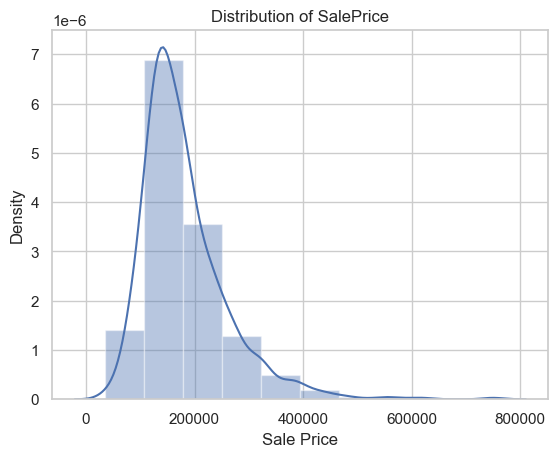

In [80]:
# Visualizing the distribution of the SalePrice
sns.set(style="whitegrid")  
sns.distplot(df_int_features['SalePrice'], kde=True, bins=10)  # Plotting the distribution
plt.title('Distribution of SalePrice') 
plt.xlabel('Sale Price')  
plt.ylabel('Density')  
plt.show()  

Sale Price varies between $100,000 - $800,000.

The density is highest in the $100,000 - $200,000 range. The data is skewed towards the left. 
The high priced homes are relatively fewer in number.

In [81]:
#correlation between variables
corr_matrix = df_int_features.corr()
#print(corr_matrix)
corr_list = corr_matrix.SalePrice.abs().sort_values(ascending=False).index[0:-1]
corr_list

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF',
       'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch',
       'PoolArea', 'MSSubClass', 'OverallCond', 'MoSold', '3SsnPorch',
       'YrSold', 'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath'],
      dtype='object')

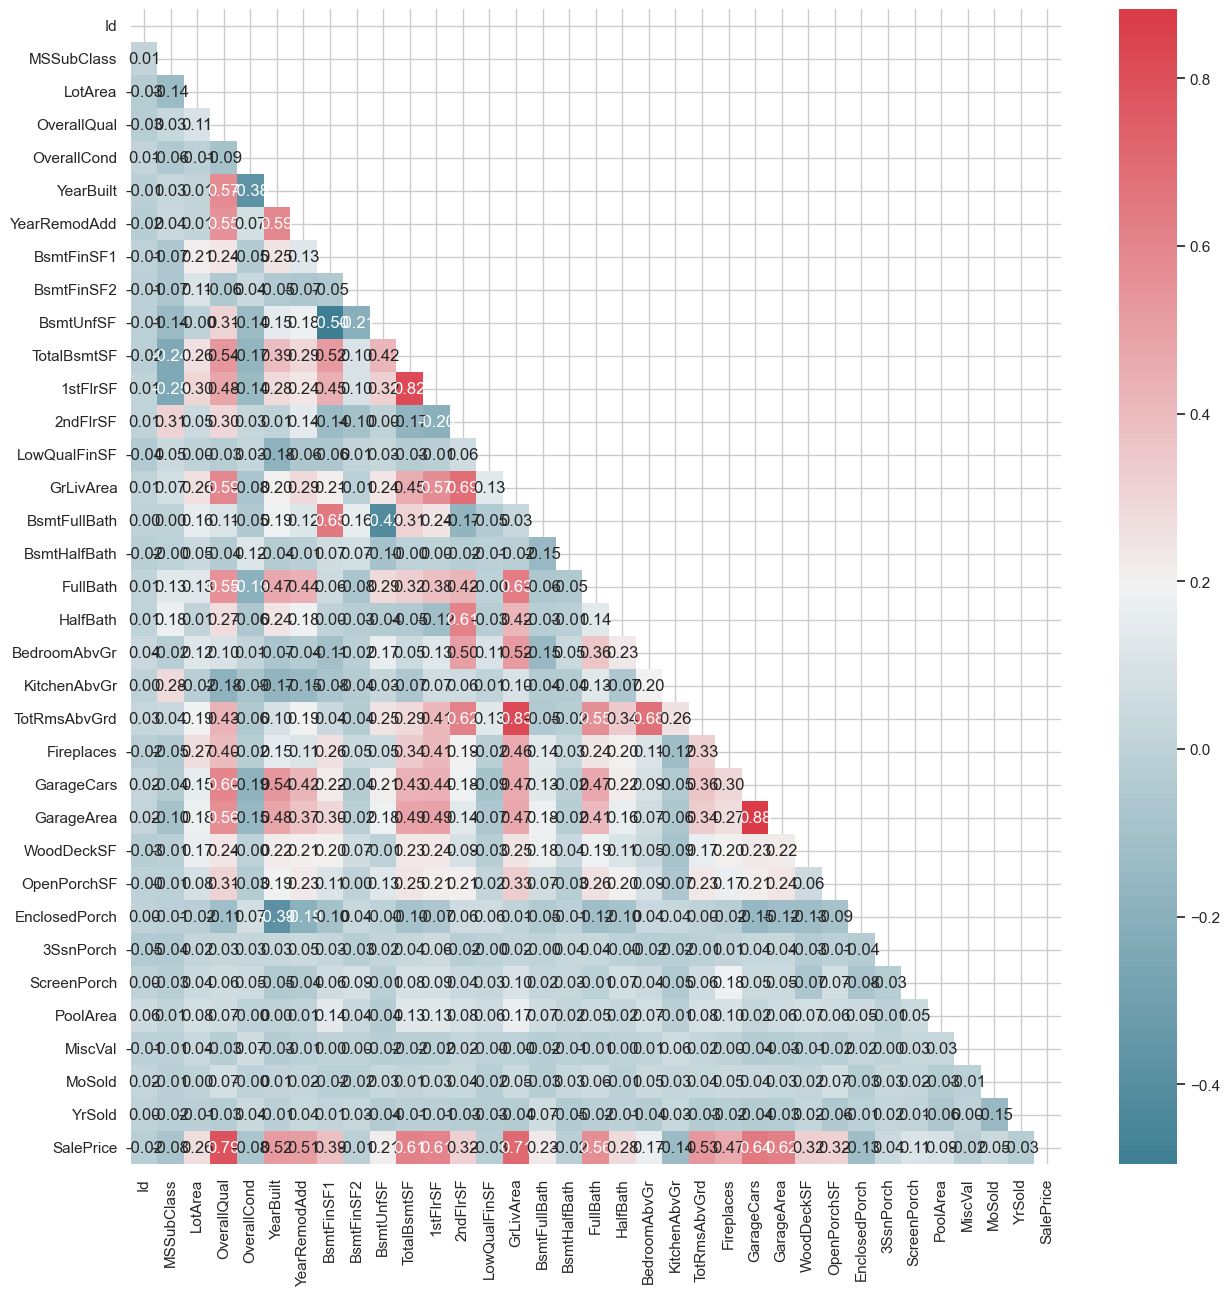

In [82]:
#Visual plot of the correlation between the quantative variables
plt.figure(figsize=(15,15))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

In [83]:
# Select features with positive correlation greater than 0.5
high_pos_corr_features = corr_matrix[(corr_matrix > 0.5) & (corr_matrix < 1)]
print(high_pos_corr_features)

               Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
Id            NaN         NaN      NaN          NaN          NaN        NaN   
MSSubClass    NaN         NaN      NaN          NaN          NaN        NaN   
LotArea       NaN         NaN      NaN          NaN          NaN        NaN   
OverallQual   NaN         NaN      NaN          NaN          NaN   0.572323   
OverallCond   NaN         NaN      NaN          NaN          NaN        NaN   
YearBuilt     NaN         NaN      NaN     0.572323          NaN        NaN   
YearRemodAdd  NaN         NaN      NaN     0.550684          NaN   0.592855   
BsmtFinSF1    NaN         NaN      NaN          NaN          NaN        NaN   
BsmtFinSF2    NaN         NaN      NaN          NaN          NaN        NaN   
BsmtUnfSF     NaN         NaN      NaN          NaN          NaN        NaN   
TotalBsmtSF   NaN         NaN      NaN     0.537808          NaN        NaN   
1stFlrSF      NaN         NaN      NaN          NaN 

In [84]:
# Find columns where at least one correlation is greater than 0.5
high_corr_features = high_pos_corr_features.dropna(thresh=1).index.tolist()

# Display selected features
print("Selected features with positive correlation > 0.5:")
print(high_corr_features)

Selected features with positive correlation > 0.5:
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


Finding correlation between the quantitative features help us understand what are the driving factors in the dataset.
The Pearson correlation coefficient is a measure of the linear relationship between two variables. Based on the pearson correlation, the features with positive correlation > 0.5 are listed above.

In [87]:
######Running PCA to understand how the data is spread within the dataset ##########

Principal Component Analysis is a unsupervised machine learning tecnique which is used to aid dimensionality reduction without losing any information present in the data.
High dimensionality could drive the model to overfit and become very specific to the dataset.

In [88]:
target = ['SalePrice']
df_pca=df_int_features.drop(columns=target)
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [90]:
#Running PCA using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
pcs = PCA(whiten=True)
scores = pd.DataFrame(pcs.fit_transform(scaler.fit_transform(df_pca.iloc[:,0:])),
                      columns=['PC{}'.format(i) for i in range(1, len(df_pca.iloc[:,0:].columns) + 1)]) 
scores.head(500)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    0.961285  0.423855  0.518979 -1.848095  0.895482  1.329124 -0.684268   
1   -0.243370 -0.342580 -0.993169 -1.660896 -0.770158  0.566875 -0.187998   
2    1.098143 -0.017607  0.364583 -1.722744  0.073446 -0.334435  1.196201   
3   -0.466864 -1.207817  0.084811 -1.819001 -0.624609  1.663305 -0.918292   
4    1.600105 -0.336455  0.573594 -1.622228 -0.859152 -0.980340  1.911652   
..        ...       ...       ...       ...       ...       ...       ...   
495 -2.032508  0.420692  0.132663 -0.501652 -0.454070 -1.826028  1.204906   
496  1.136045 -0.394843 -1.258755 -0.330831 -2.025751 -0.093394 -1.529244   
497 -1.105841 -0.186622  0.737985 -0.579181 -0.912198 -0.369308 -0.370752   
498 -0.388352  1.289005 -0.968479 -0.457270  0.877844 -0.822195 -0.403673   
499 -0.770064 -0.303093 -1.109968 -0.514590  0.498658 -0.349005 -0.531329   

          PC8       PC9      PC10  ...      PC25      PC26      PC27  \
0   -0.708433 -0.698809 -1.665124  ...  0.480971 -0.152899 -0.297896   
1   -0.033364  0.907812 -0.131630  ...  0.480116 -0.447183 -0.070958   
2   -0.636078 -0.581168 -0.105942  ... -0.223843 -0.643829  0.788659   
3    0.955051  1.439363 -1.135417  ... -0.012196  0.548916  0.191297   
4   -0.210073 -0.673564 -1.241390  ... -0.428130 -0.226298  0.187949   
..        ...       ...       ...  ...       ...       ...       ...   
495 -0.627487 -0.327195  0.070755  ...  0.080970  0.330293  0.000550   
496  1.746911  1.092059 -0.618176  ... -0.664251 -0.044055 -2.654298   
497  0.836273  0.472473 -1.912008  ... -0.840254 -0.123998  0.016524   
498 -1.381250  0.518137 -0.006104  ... -0.646690 -0.323000  0.387647   
499 -1.237311  0.440360  0.111859  ...  1.663664 -0.046563  0.039923   

         PC28      PC29      PC30      PC31      PC32       PC33       PC34  
0   -0.210086  1.190485  0.177168  0.427654 -0.190761  -0.662703  -0.905628  
1    0.632350 -0.228628 -0.831217  0.922772 -0.319162  -1.025319  -1.641222  
2   -1.170896 -0.434774  0.017291 -0.660437  0.094243  -5.925849  -3.274630  
3    1.211835 -0.208687 -0.118646 -0.640311  0.318135  10.074121  -8.163787  
4   -0.539473  0.477514  0.139154  0.278084 -0.030396   2.960903  14.746448  
..        ...       ...       ...       ...       ...        ...        ...  
495  0.756654 -0.296878  0.136039  0.941721 -0.197451   0.445309  -0.703137  
496  1.453226 -0.389797 -1.514196 -1.537618  0.447810  -1.778502  -2.028540  
497  0.119378  0.895330 -0.074919 -0.436414  0.249480  -0.277659   0.813333  
498 -0.044594 -0.923211 -0.039607  0.422108 -0.358352   0.129050   0.493707  
499  0.060484  0.449015 -0.073976  0.257054  0.812432  -0.104188   0.947177  

[500 rows x 34 columns]

In [91]:
pcsSummary = pd.DataFrame({'Explained Variance': pcs.explained_variance_, #explained variance
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,  #explained variance %
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)}) #cumulative %
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = scores.columns
pcsSummary

PC1       PC2       PC3       PC4       PC5  \
Explained Variance        0.21205  0.115387  0.099548  0.083620  0.071692   
Explained Variance Ratio  0.21105  0.114843  0.099079  0.083225  0.071354   
Cumulative Proportion     0.21105  0.325893  0.424972  0.508197  0.579552   

                               PC6       PC7       PC8       PC9      PC10  \
Explained Variance        0.058636  0.056407  0.048626  0.040647  0.030422   
Explained Variance Ratio  0.058359  0.056141  0.048397  0.040456  0.030279   
Cumulative Proportion     0.637911  0.694051  0.742448  0.782904  0.813183   

                          ...      PC25      PC26      PC27      PC28  \
Explained Variance        ...  0.003597  0.003239  0.002736  0.002669   
Explained Variance Ratio  ...  0.003580  0.003223  0.002723  0.002656   
Cumulative Proportion     ...  0.985092  0.988316  0.991038  0.993694   

                              PC29      PC30      PC31      PC32  \
Explained Variance        0.002267  0.001751  0.001330  0.000987   
Explained Variance Ratio  0.002256  0.001743  0.001324  0.000983   
Cumulative Proportion     0.995951  0.997694  0.999017  1.000000   

                                  PC33          PC34  
Explained Variance        8.910478e-34  8.337133e-34  
Explained Variance Ratio  8.868461e-34  8.297820e-34  
Cumulative Proportion     1.000000e+00  1.000000e+00  

[3 rows x 34 columns]

PCA is applied using an instance of the PCA class from sci-kit learn. 
The explained_variance_ratio_ attribute of the PCA object can help you understand the proportion of variance explained by each principal component. In most cases, PC1 and PC2 explain the maximum spread of the data.
This can be seen in the scree plot below.

Text(0.5, 1.0, 'Explained Variance by Component')

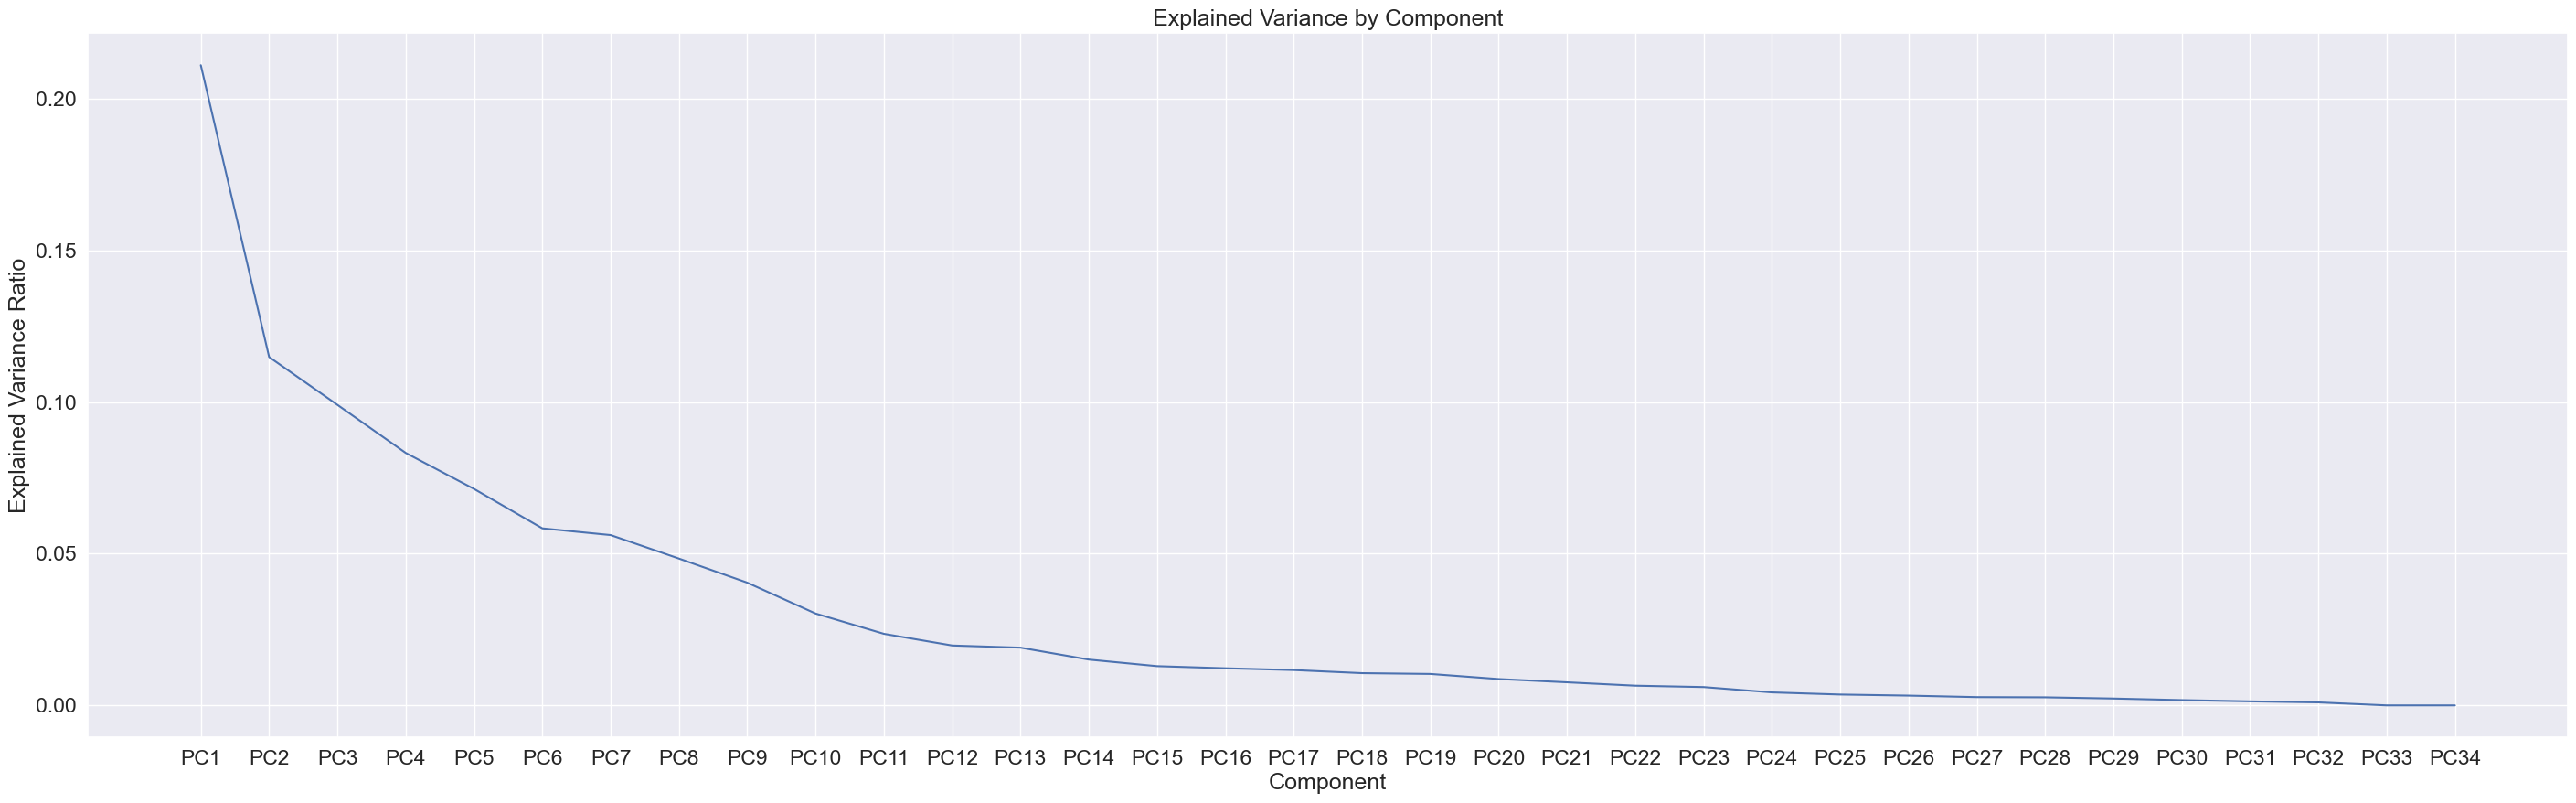

In [92]:
#scree plot between components and Explained variance ratio
plt.figure(figsize=(35,10))
plt.plot(pcsSummary[1:2].transpose())
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

In [93]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary.columns, 
                                index=df_pca.iloc[:,:].columns)
pcsComponents_df

PC1       PC2       PC3       PC4       PC5       PC6  \
Id            -0.010542 -0.028671  0.103383  0.989449  0.053358  0.041708   
MSSubClass     0.049827 -0.086267  0.394918 -0.059323  0.567054 -0.006070   
LotArea        0.012640 -0.003124 -0.002842 -0.003234 -0.050730  0.025408   
OverallQual    0.263813 -0.012181 -0.016049 -0.002445 -0.107209  0.008198   
OverallCond   -0.039227  0.026781  0.010128 -0.000274  0.057226 -0.066324   
YearBuilt      0.350037  0.052748 -0.175252  0.020486  0.092343  0.143393   
YearRemodAdd   0.618875  0.175429 -0.291633  0.008602  0.444531 -0.150268   
BsmtFinSF1     0.036817  0.021276 -0.042339  0.006616 -0.031344  0.166477   
BsmtFinSF2    -0.018915  0.016352 -0.011766 -0.000673 -0.027808  0.073950   
BsmtUnfSF      0.111398 -0.032083 -0.097756  0.018387 -0.197314 -0.346579   
TotalBsmtSF    0.072036  0.011332 -0.079323  0.012978 -0.111100  0.039115   
1stFlrSF       0.080504  0.009714 -0.091753  0.024770 -0.163885  0.041275   
2ndFlrSF       0.188969 -0.144157  0.506144 -0.057283 -0.028984 -0.108635   
LowQualFinSF  -0.012922 -0.014473  0.024303 -0.018071 -0.007396 -0.020695   
GrLivArea      0.138219 -0.049666  0.124196 -0.003895 -0.146626 -0.010606   
BsmtFullBath   0.046566  0.083325 -0.092986  0.017045  0.023411  0.366702   
BsmtHalfBath  -0.009490 -0.019253 -0.004130 -0.011276  0.003531 -0.010012   
FullBath       0.273068 -0.035454  0.058557  0.012033 -0.090460 -0.128449   
HalfBath       0.241542 -0.112731  0.508697 -0.062370  0.008118  0.151255   
BedroomAbvGr   0.039440 -0.053784  0.126393  0.004295 -0.117151 -0.077686   
KitchenAbvGr  -0.017074 -0.008431  0.046885 -0.002961  0.016963 -0.041436   
TotRmsAbvGrd   0.147349 -0.069457  0.172651  0.003340 -0.191646 -0.060790   
Fireplaces     0.174744 -0.058181  0.091647 -0.017829 -0.415829  0.214793   
GarageCars     0.287293 -0.016393 -0.059916  0.041469 -0.199270  0.110178   
GarageArea     0.210768 -0.003596 -0.066584  0.037058 -0.183199  0.107160   
WoodDeckSF     0.099986  0.016803 -0.010714 -0.011787 -0.061153  0.084520   
OpenPorchSF    0.093751 -0.031216  0.020767  0.001315 -0.053228 -0.009468   
EnclosedPorch -0.056981 -0.017049  0.040354 -0.005098 -0.036228 -0.030365   
3SsnPorch      0.004903  0.004670 -0.009230 -0.007716 -0.005094 -0.008249   
ScreenPorch    0.006424 -0.007795  0.028632 -0.000645 -0.074136  0.027717   
PoolArea       0.006618 -0.010793  0.007112  0.009810 -0.012613  0.022223   
MiscVal       -0.001618  0.000145  0.002199 -0.001100  0.000133 -0.001156   
MoSold         0.034232 -0.209453 -0.073481  0.060127 -0.109354 -0.694327   
YrSold        -0.016317  0.923863  0.273902  0.018231 -0.136317 -0.185370   

                    PC7       PC8       PC9      PC10  ...      PC25  \
Id            -0.031090 -0.020400  0.023239  0.033968  ...  0.008643   
MSSubClass     0.158672  0.600608  0.066691  0.205134  ... -0.106096   
LotArea        0.017324  0.004805  0.036713 -0.015960  ... -0.059447   
OverallQual    0.006606  0.091435  0.018257  0.055636  ...  0.011954   
OverallCond   -0.006182 -0.226850  0.385853 -0.034684  ...  0.119054   
YearBuilt      0.078031  0.105110 -0.478839  0.121069  ...  0.195083   
YearRemodAdd  -0.071354 -0.290023  0.322618  0.041291  ... -0.047199   
BsmtFinSF1     0.171859  0.013372  0.050250 -0.098068  ... -0.131278   
BsmtFinSF2     0.080175 -0.028461  0.051853 -0.045764  ...  0.002232   
BsmtUnfSF     -0.451633  0.164800 -0.130509  0.317924  ...  0.017782   
TotalBsmtSF    0.005423  0.068493  0.009030  0.019921  ... -0.113928   
1stFlrSF       0.011605  0.108347  0.068403 -0.004868  ... -0.053130   
2ndFlrSF      -0.087941 -0.101801  0.129716 -0.272304  ...  0.116681   
LowQualFinSF  -0.030297  0.014114  0.067028 -0.037412  ...  0.122872   
GrLivArea     -0.027949  0.050873  0.113847 -0.113965  ...  0.015013   
BsmtFullBath   0.411287  0.030540  0.099318 -0.258715  ...  0.056992   
BsmtHalfBath   0.017021 -0.039463  0.057980  0.045040  ...  0.078650   
FullBath      -0.124174  0.2

<Axes: >

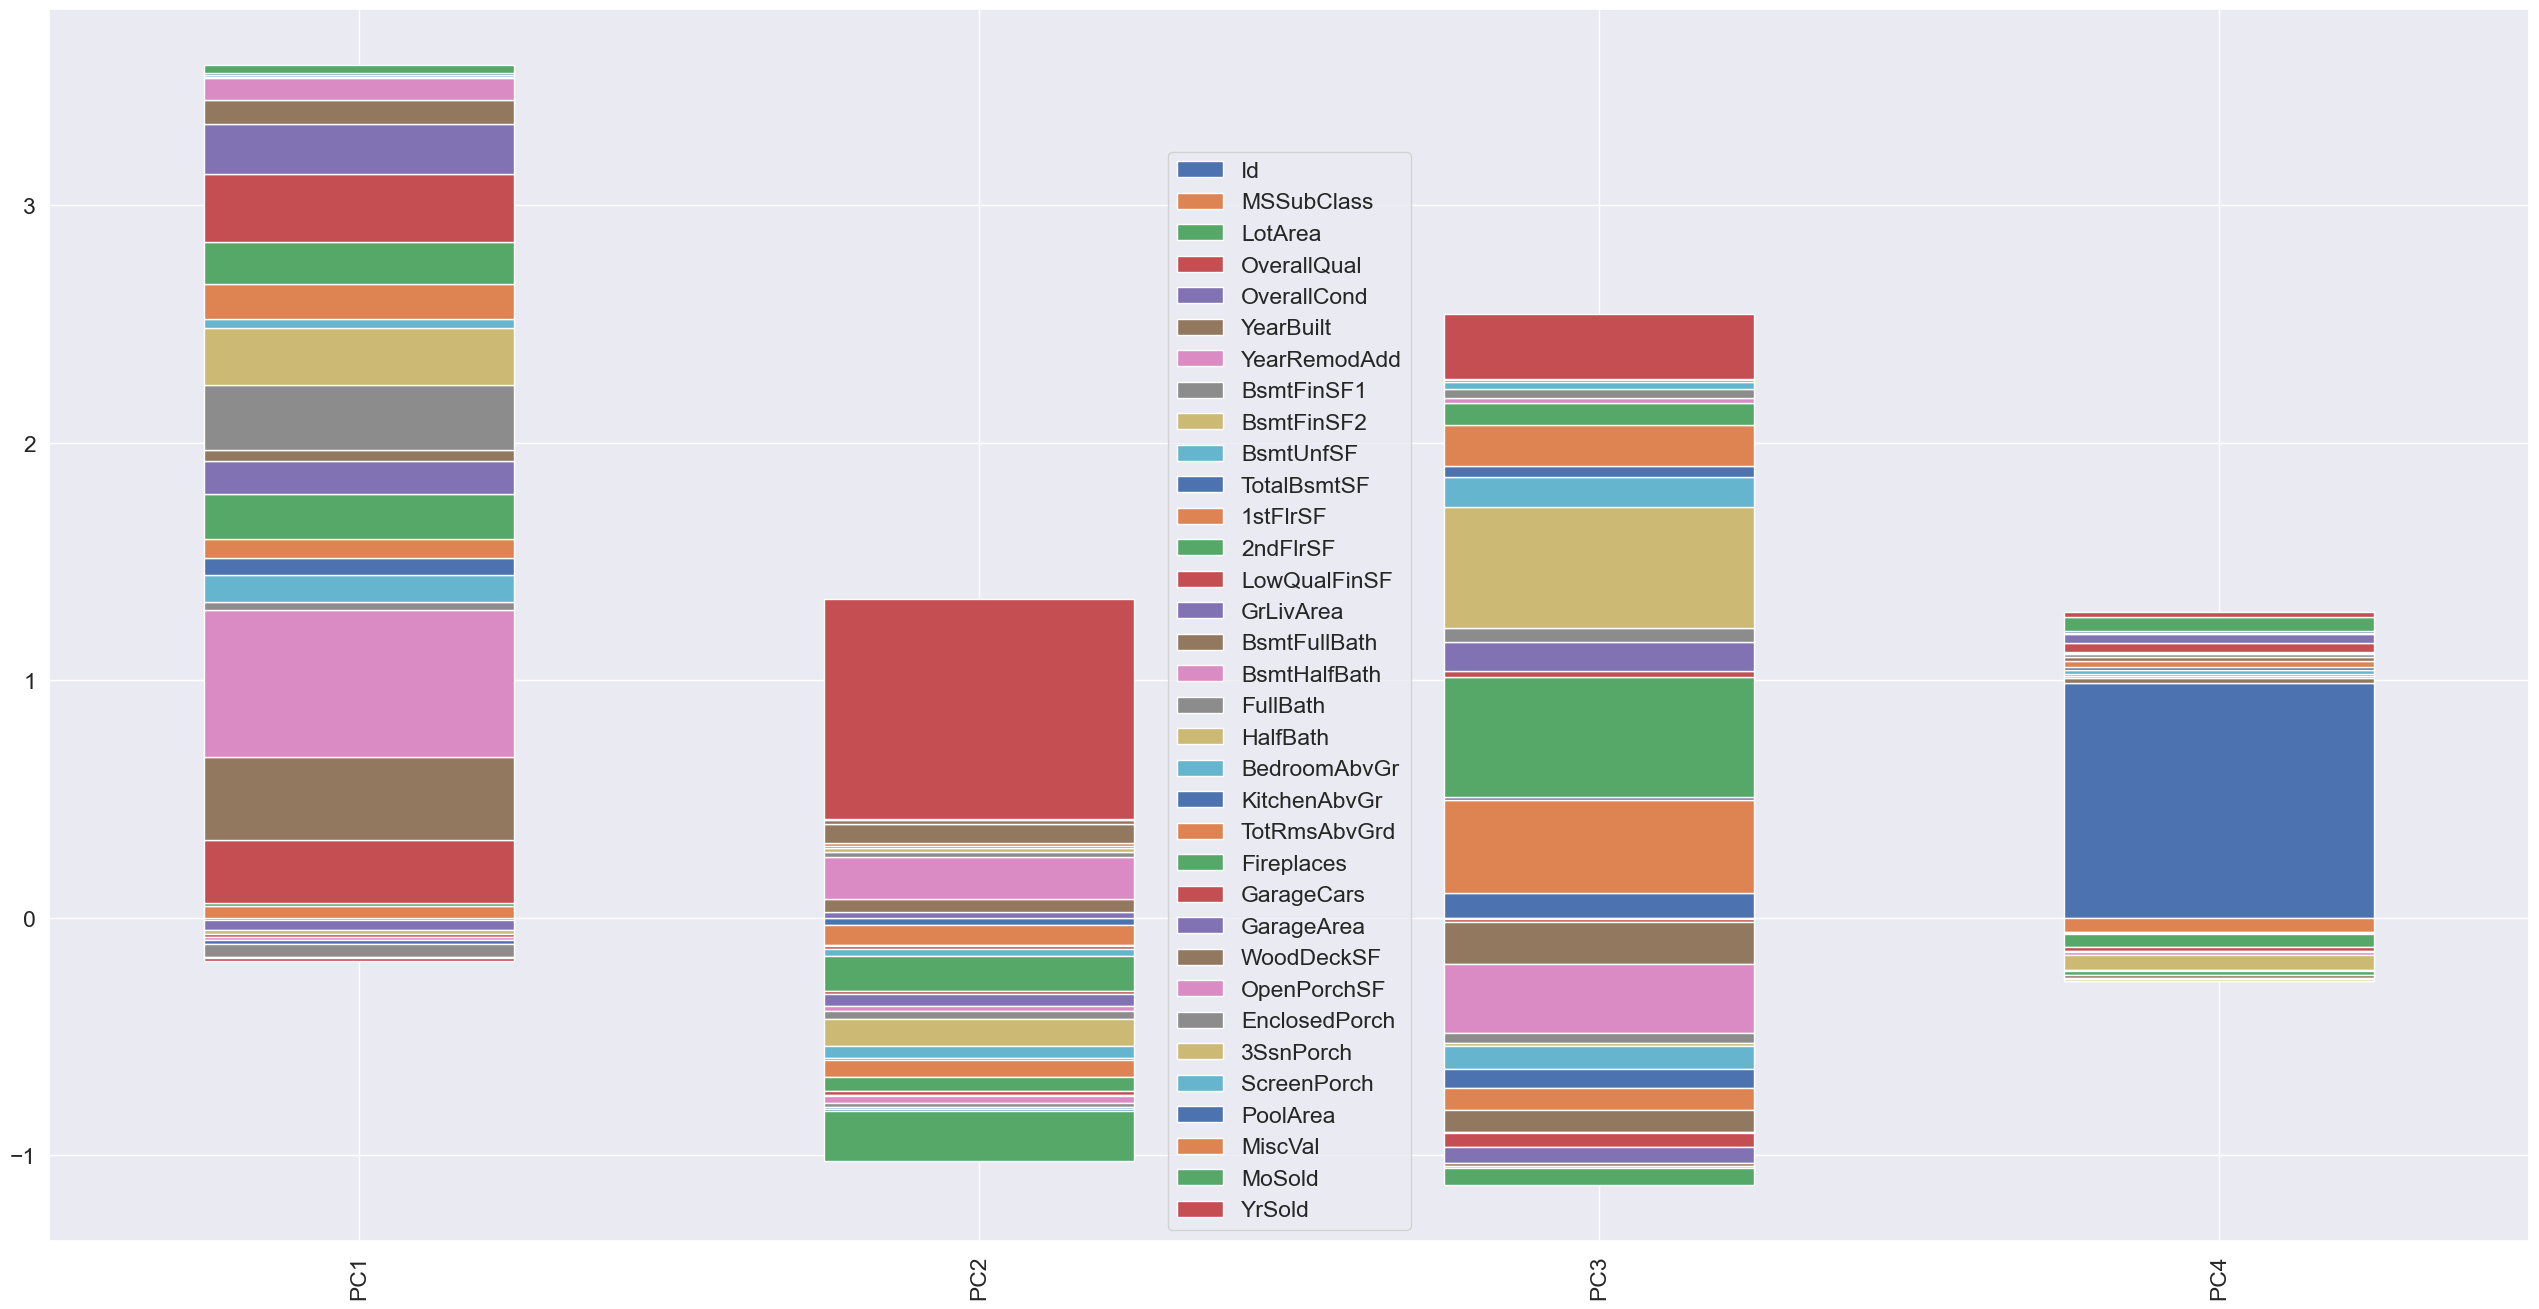

In [94]:
pcsComponents_df[['PC1','PC2','PC3','PC4']].transpose().plot(kind='bar', stacked=True,figsize=(32,16))

In [95]:
##Columns of interest - integer features

In [96]:
pc1_values = list(pcsComponents_df['PC1'])
pc2_values = list(pcsComponents_df['PC2'])
features = list(pcsComponents_df.index)
df_pc1_pc2 = pd.DataFrame({'features':features,'PC1':pc1_values,'PC2':pc2_values})
print(df_pc1_pc2)

         features       PC1       PC2
0              Id -0.010542 -0.028671
1      MSSubClass  0.049827 -0.086267
2         LotArea  0.012640 -0.003124
3     OverallQual  0.263813 -0.012181
4     OverallCond -0.039227  0.026781
5       YearBuilt  0.350037  0.052748
6    YearRemodAdd  0.618875  0.175429
7      BsmtFinSF1  0.036817  0.021276
8      BsmtFinSF2 -0.018915  0.016352
9       BsmtUnfSF  0.111398 -0.032083
10    TotalBsmtSF  0.072036  0.011332
11       1stFlrSF  0.080504  0.009714
12       2ndFlrSF  0.188969 -0.144157
13   LowQualFinSF -0.012922 -0.014473
14      GrLivArea  0.138219 -0.049666
15   BsmtFullBath  0.046566  0.083325
16   BsmtHalfBath -0.009490 -0.019253
17       FullBath  0.273068 -0.035454
18       HalfBath  0.241542 -0.112731
19   BedroomAbvGr  0.039440 -0.053784
20   KitchenAbvGr -0.017074 -0.008431
21   TotRmsAbvGrd  0.147349 -0.069457
22     Fireplaces  0.174744 -0.058181
23     GarageCars  0.287293 -0.016393
24     GarageArea  0.210768 -0.003596
25     WoodD

In [97]:
# Filtering rows where PC1,PC2 variances are above 0.2 
pc1_high_var_features = df_pc1_pc2[df_pc1_pc2['PC1'] > 0.2][['features', 'PC1']]
pc2_high_var_features = df_pc1_pc2[df_pc1_pc2['PC2'] > 0.2][['features', 'PC2']]
# Printing the filtered 'features' and 'pc1' values
print(pc1_high_var_features)
print(pc2_high_var_features)

        features       PC1
3    OverallQual  0.263813
5      YearBuilt  0.350037
6   YearRemodAdd  0.618875
17      FullBath  0.273068
18      HalfBath  0.241542
23    GarageCars  0.287293
24    GarageArea  0.210768
   features       PC2
33   YrSold  0.923863


Based on the PCA calculations, picking the columns with variances above 0.2

In [98]:
print("Quantitative features highly correlated with SalePrice")
print(high_corr_features)

Quantitative features highly correlated with SalePrice
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


# Columns of interest - quantitative

Visualizing the columns of interest to understand if there are any outliers or corner cases.

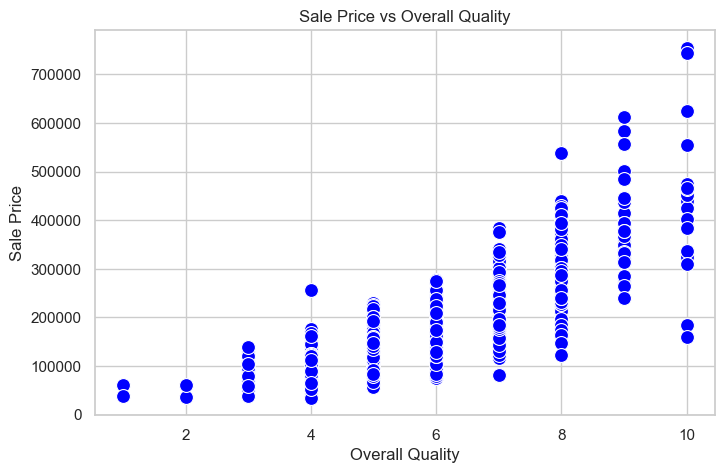

In [120]:
#scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_int_features['OverallQual'], y=df_int_features['SalePrice'], color='blue', s=100)  # Use seaborn for enhanced styling

# Set labels and title
plt.title('Sale Price vs Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

# Show the plot
plt.show()

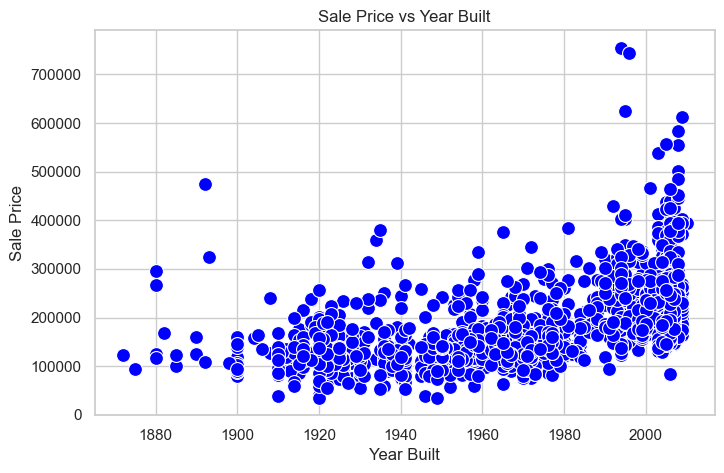

In [121]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_int_features['YearBuilt'], y=df_int_features['SalePrice'], color='blue', s=100)  # Use seaborn for enhanced styling

# Set labels and title
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

# Show the plot
plt.show()

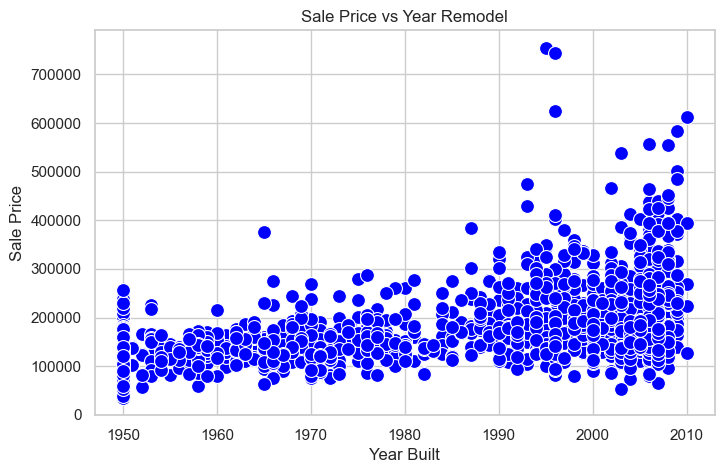

In [122]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_int_features['YearRemodAdd'], y=df_int_features['SalePrice'], color='blue', s=100)  # Use seaborn for enhanced styling

# Set labels and title
plt.title('Sale Price vs Year Remodel')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

# Show the plot
plt.show()

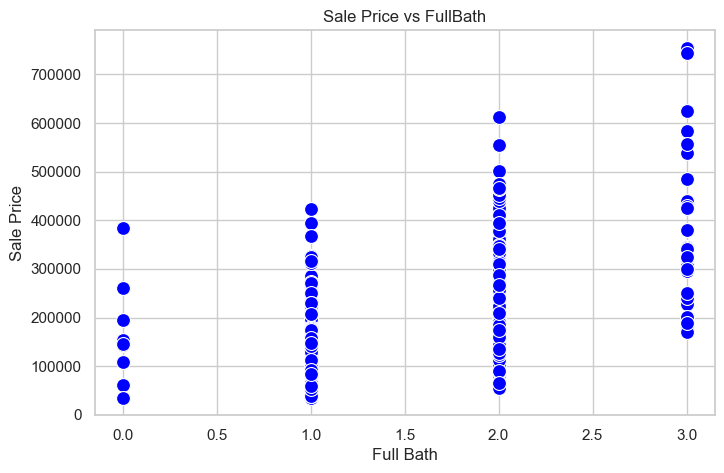

In [124]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_int_features['FullBath'], y=df_int_features['SalePrice'], color='blue', s=100)  # Use seaborn for enhanced styling

# Set labels and title
plt.title('Sale Price vs FullBath')
plt.xlabel('Full Bath')
plt.ylabel('Sale Price')

# Show the plot
plt.show()

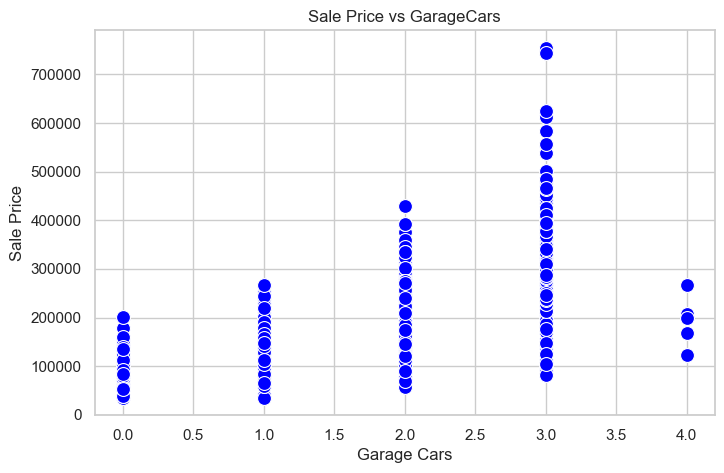

In [125]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_int_features['GarageCars'], y=df_int_features['SalePrice'], color='blue', s=100)  # Use seaborn for enhanced styling

# Set labels and title
plt.title('Sale Price vs GarageCars')
plt.xlabel('Garage Cars')
plt.ylabel('Sale Price')

# Show the plot
plt.show()

Text(0.5, 1.0, 'House price vs Year')

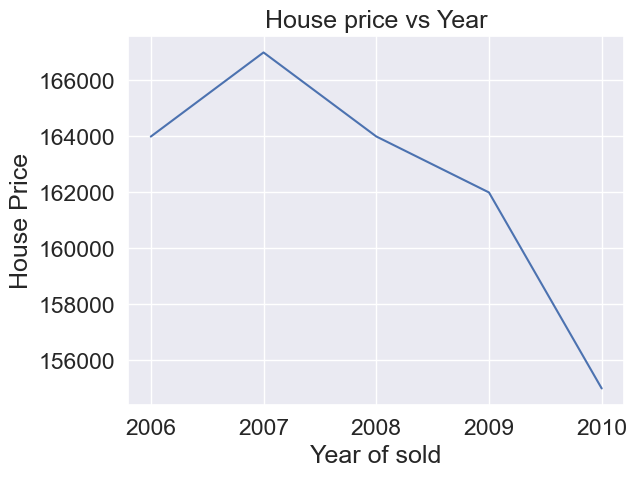

In [131]:
df_int_features.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year of sold')
plt.ylabel('House Price')
plt.title('House price vs Year')

# Outlier detection

In [101]:
# Function to detect outliers using Z-score for each column
def detect_outliers_zscore(column):
    threshold = 2.5  # Set your threshold for outliers
    z_scores = np.abs((column - column.mean()) / column.std())
    return column[z_scores > threshold]

In [102]:
# Detecting outliers for each column in the DataFrame
outliers = {}
for col in df_int_features.columns:
    outliers[col] = detect_outliers_zscore(df_int_features[col])

# Printing outliers for each column
for col, vals in outliers.items():
    if not vals.empty:
        print(f"Outliers in column '{col}':")
        #print(vals)
    else:
        print(f"No outliers found in column '{col}'.")


No outliers found in column 'Id'.
Outliers in column 'MSSubClass':
Outliers in column 'LotArea':
Outliers in column 'OverallQual':
Outliers in column 'OverallCond':
Outliers in column 'YearBuilt':
No outliers found in column 'YearRemodAdd'.
Outliers in column 'BsmtFinSF1':
Outliers in column 'BsmtFinSF2':
Outliers in column 'BsmtUnfSF':
Outliers in column 'TotalBsmtSF':
Outliers in column '1stFlrSF':
Outliers in column '2ndFlrSF':
Outliers in column 'LowQualFinSF':
Outliers in column 'GrLivArea':
Outliers in column 'BsmtFullBath':
Outliers in column 'BsmtHalfBath':
Outliers in column 'FullBath':
Outliers in column 'HalfBath':
Outliers in column 'BedroomAbvGr':
Outliers in column 'KitchenAbvGr':
Outliers in column 'TotRmsAbvGrd':
Outliers in column 'Fireplaces':
Outliers in column 'GarageCars':
Outliers in column 'GarageArea':
Outliers in column 'WoodDeckSF':
Outliers in column 'OpenPorchSF':
Outliers in column 'EnclosedPorch':
Outliers in column '3SsnPorch':
Outliers in column 'ScreenP

In [103]:
col_list = df_int_features.columns.tolist()
#print(col_list)

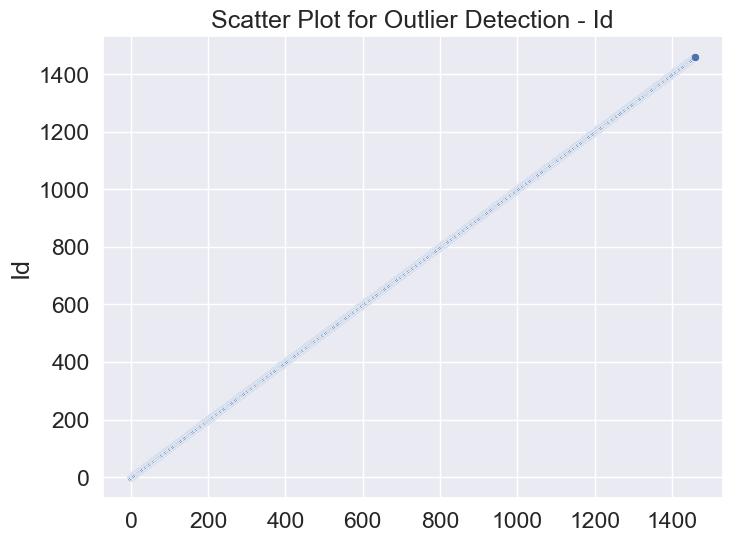

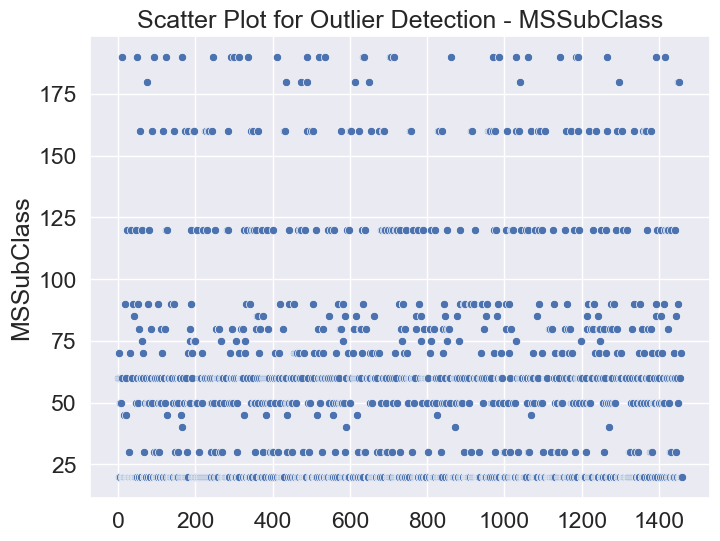

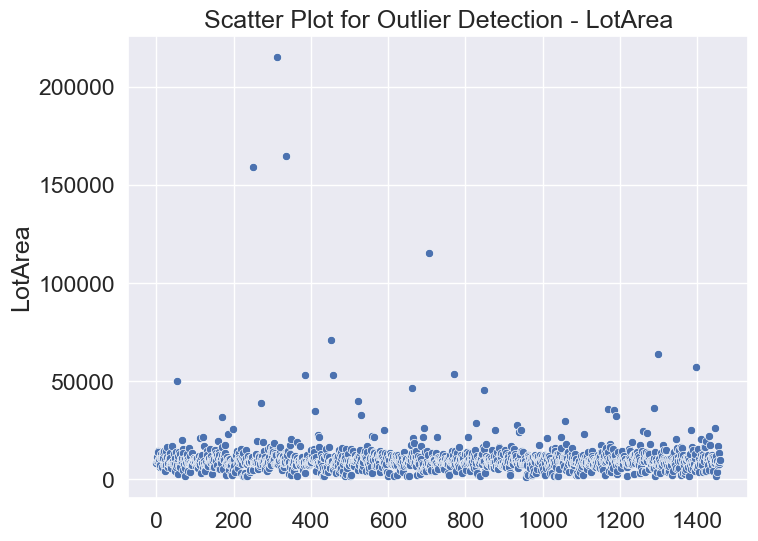

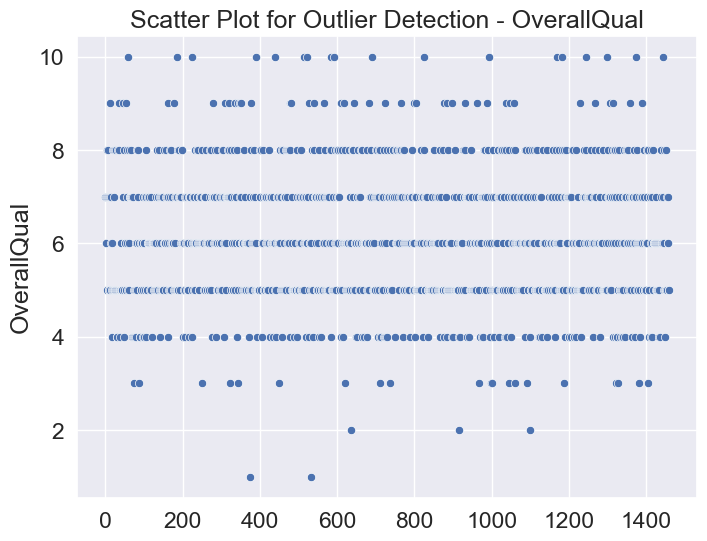

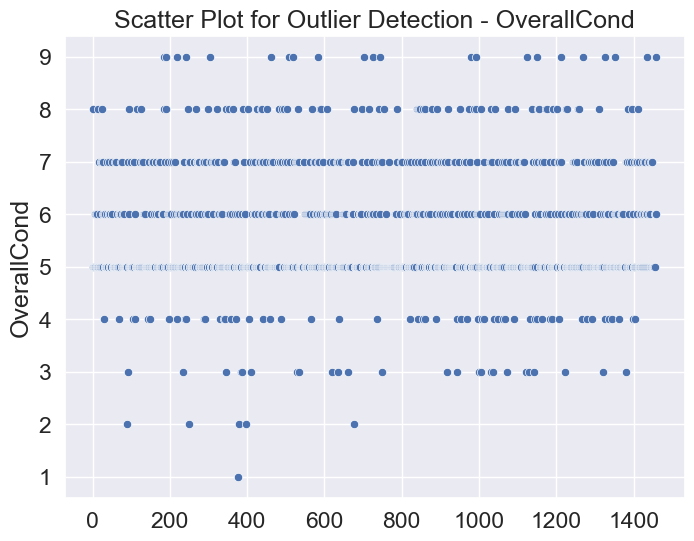

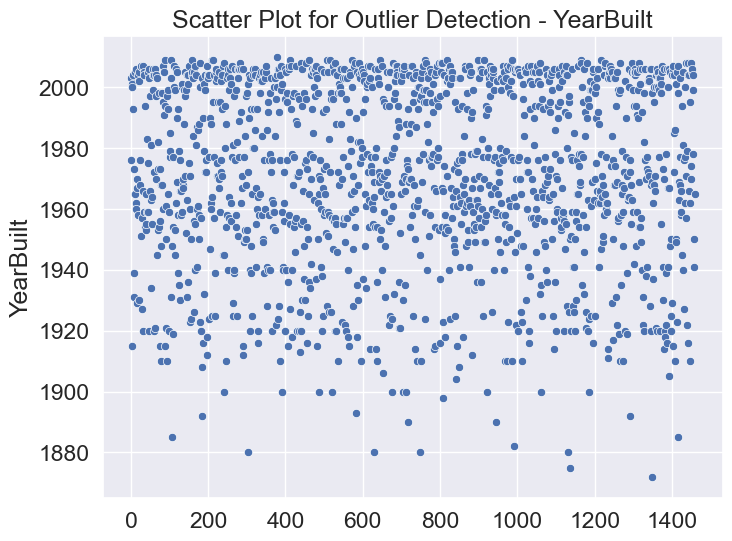

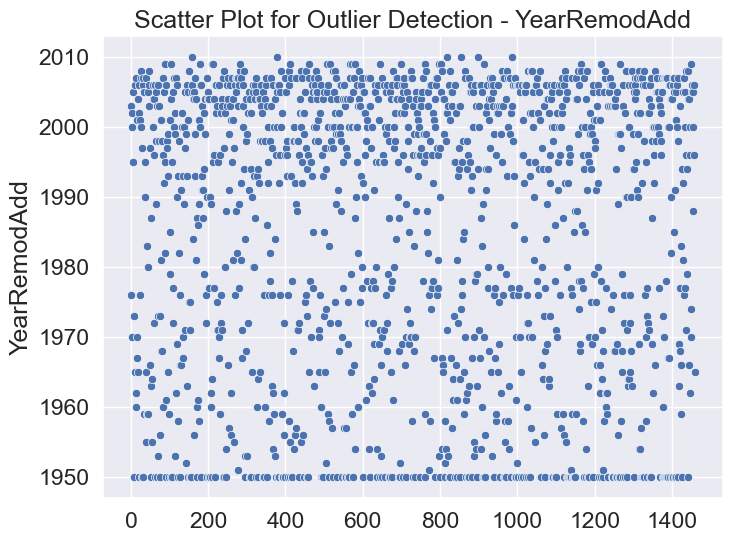

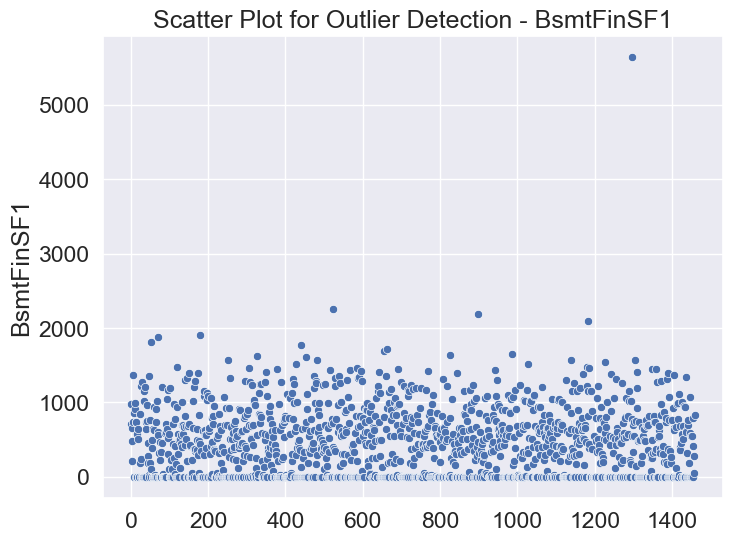

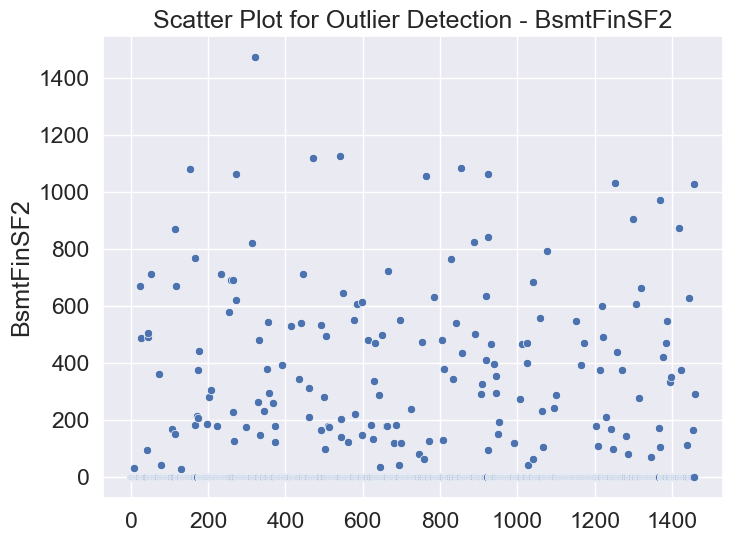

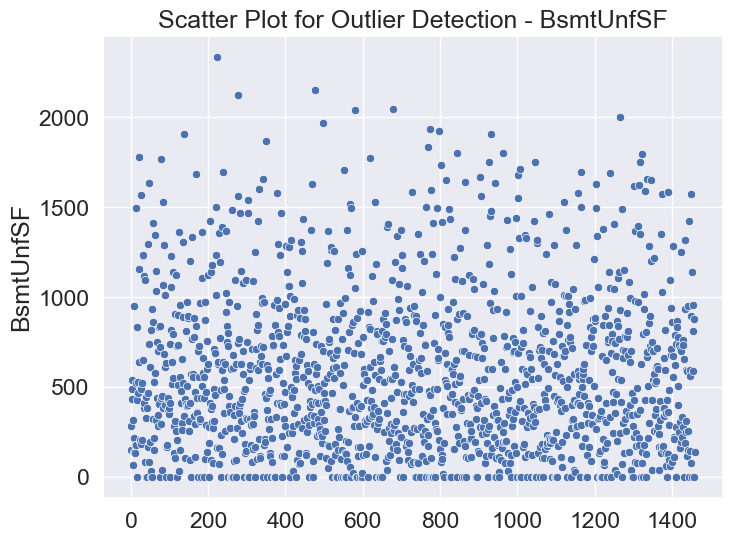

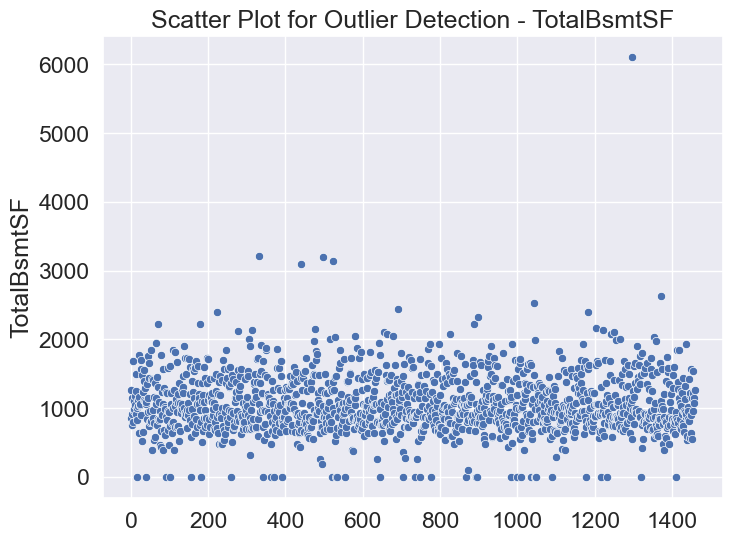

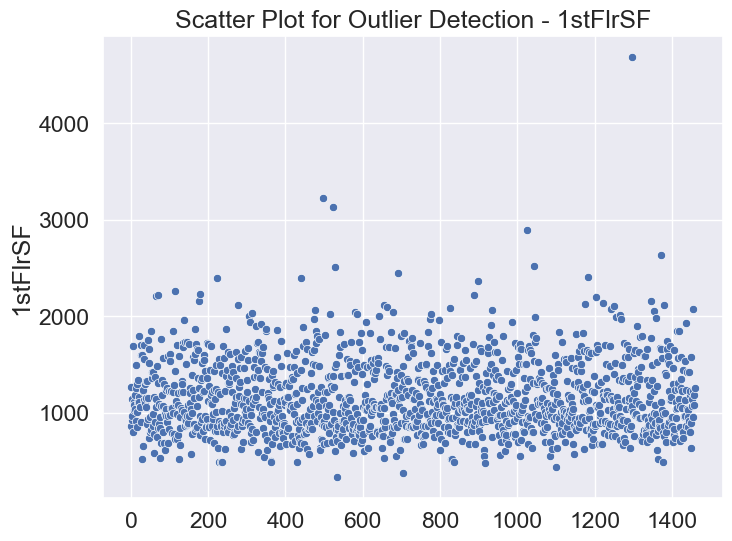

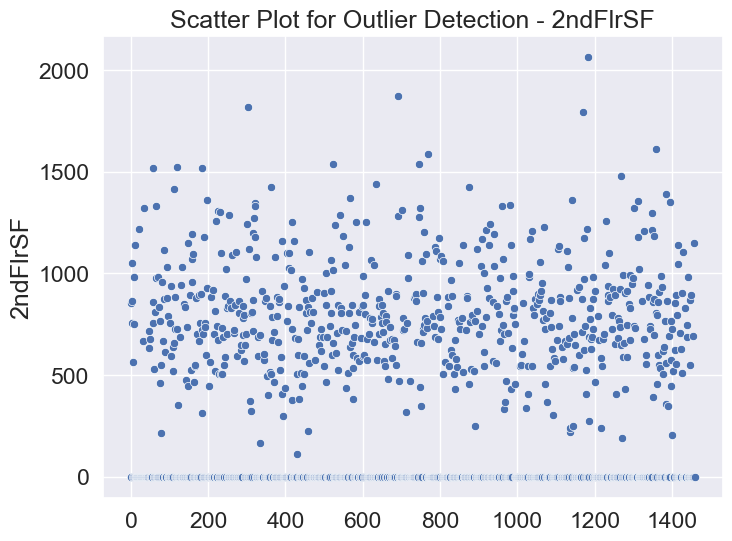

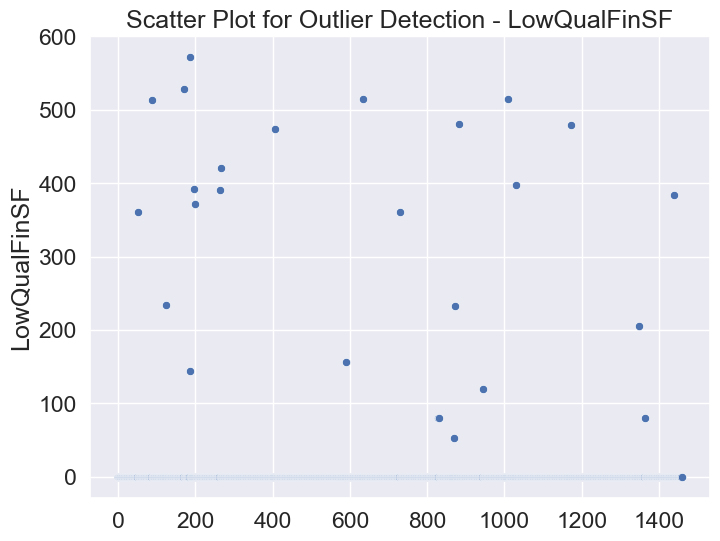

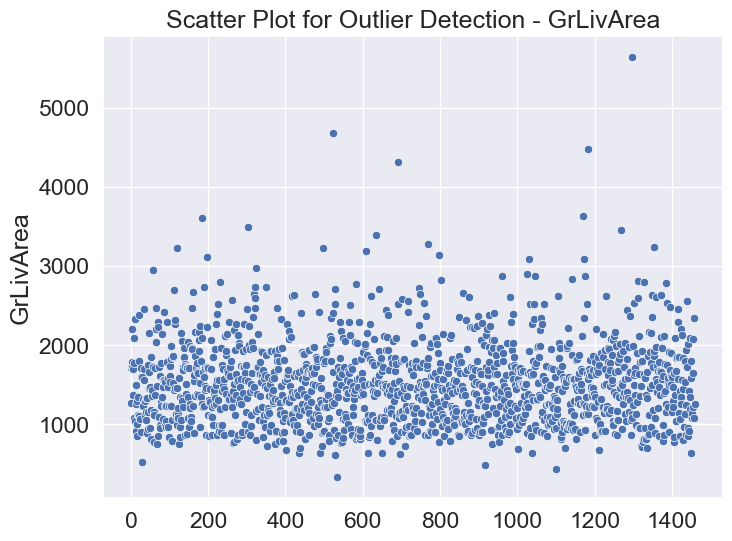

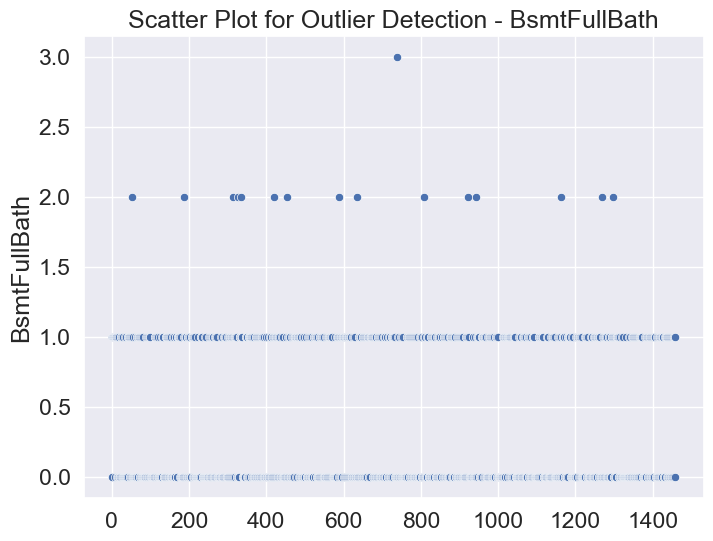

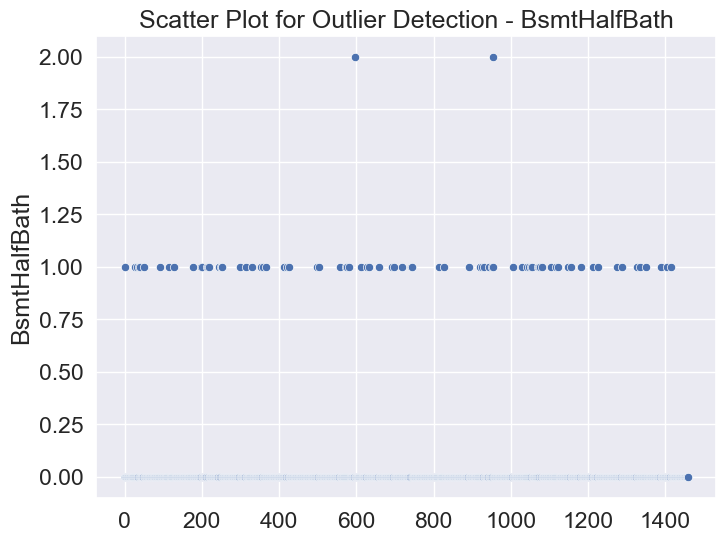

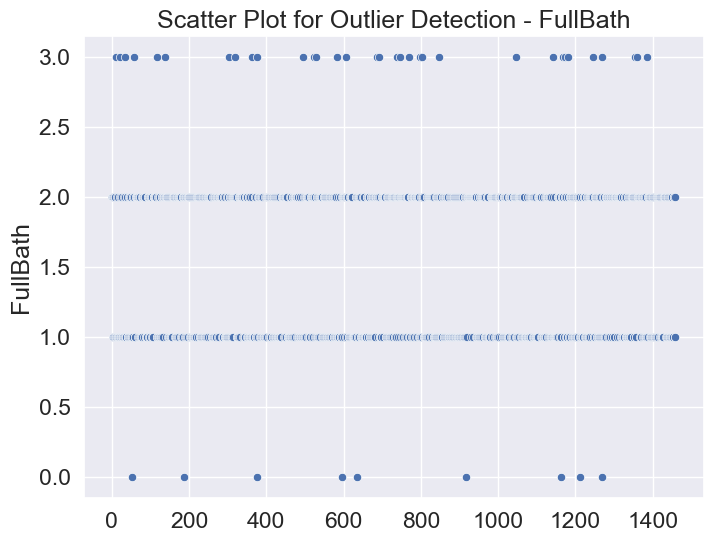

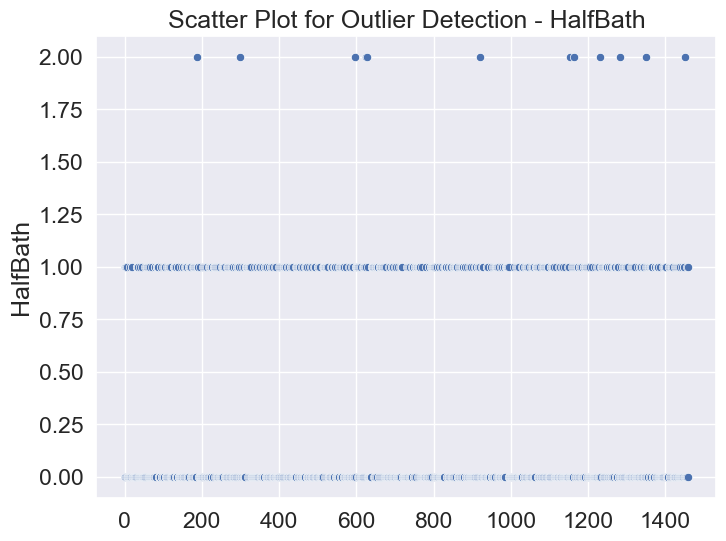

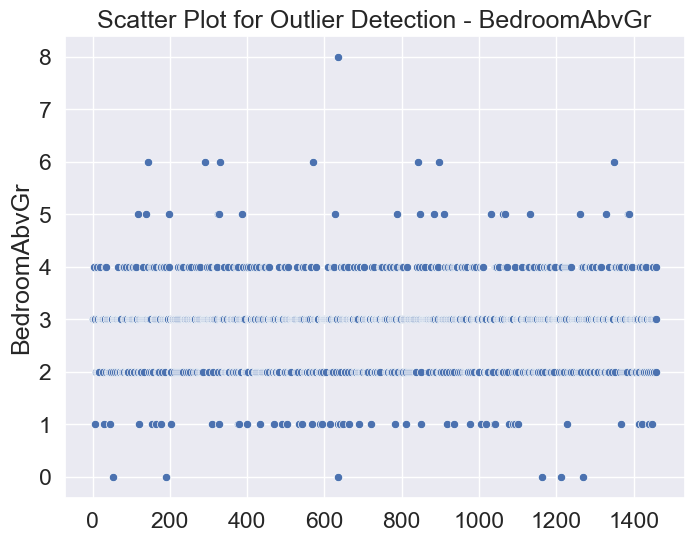

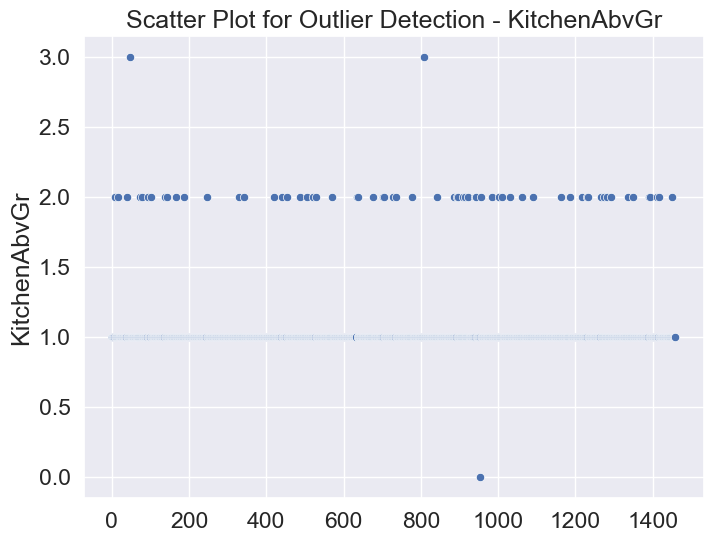

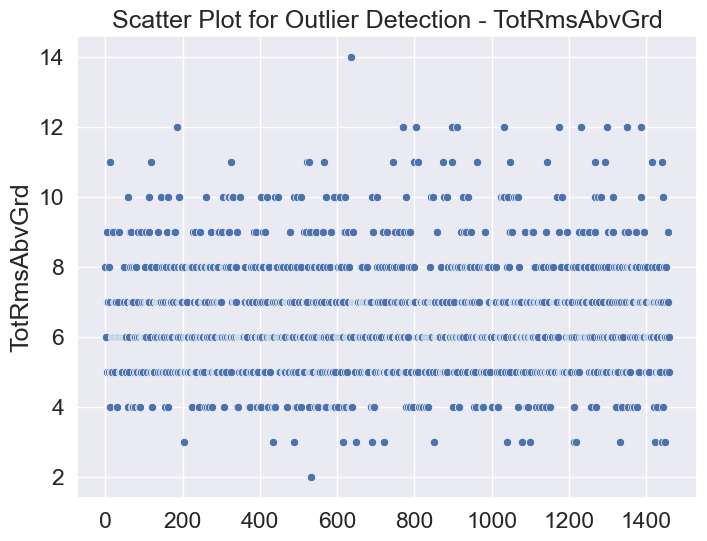

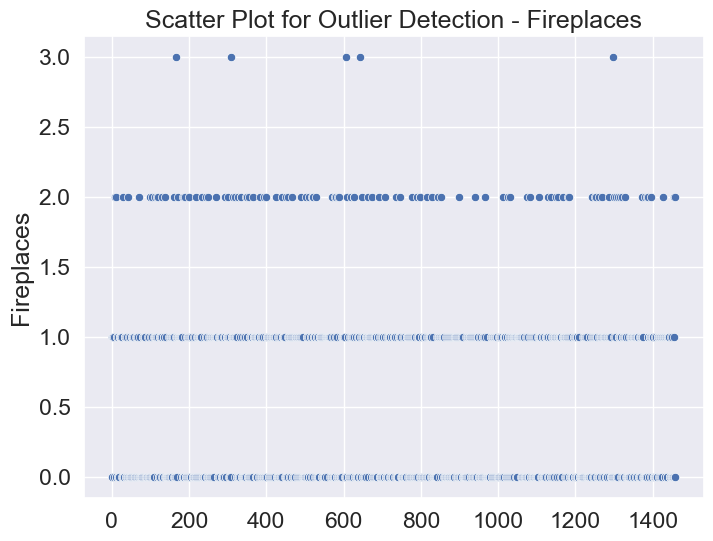

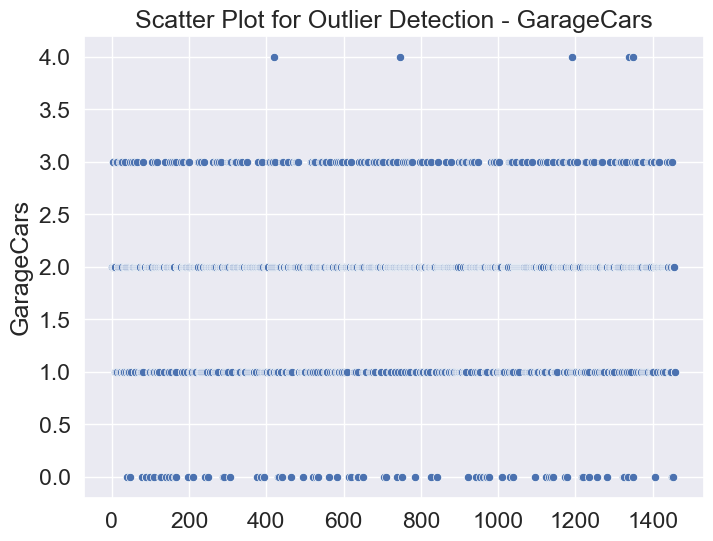

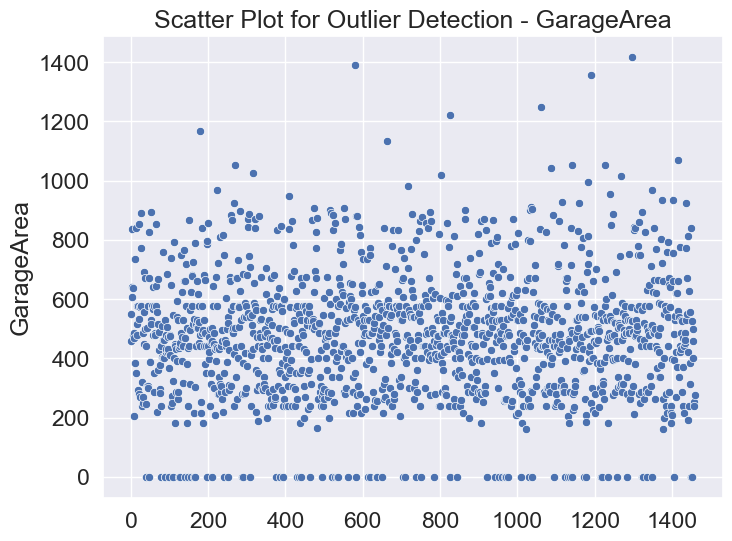

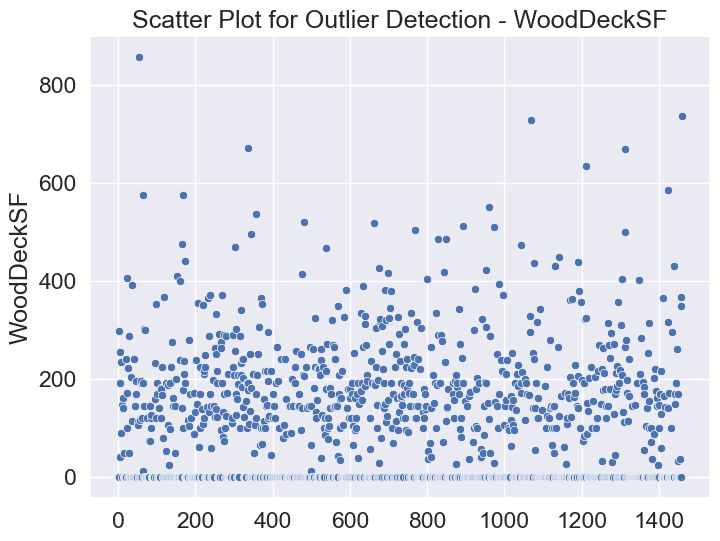

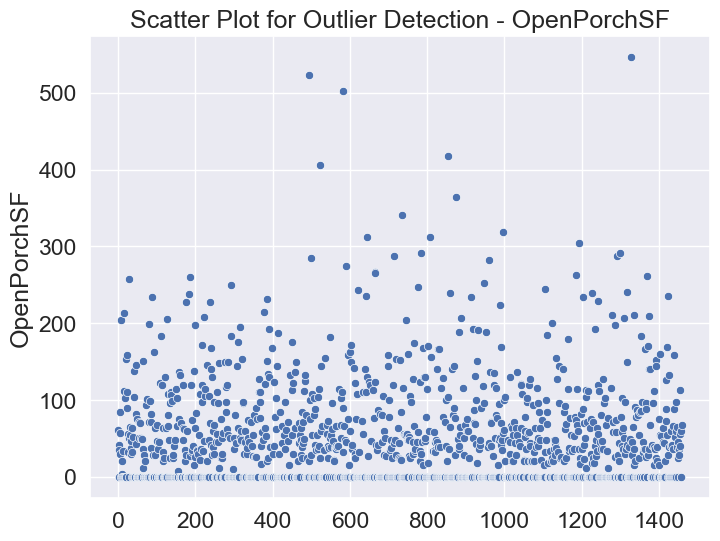

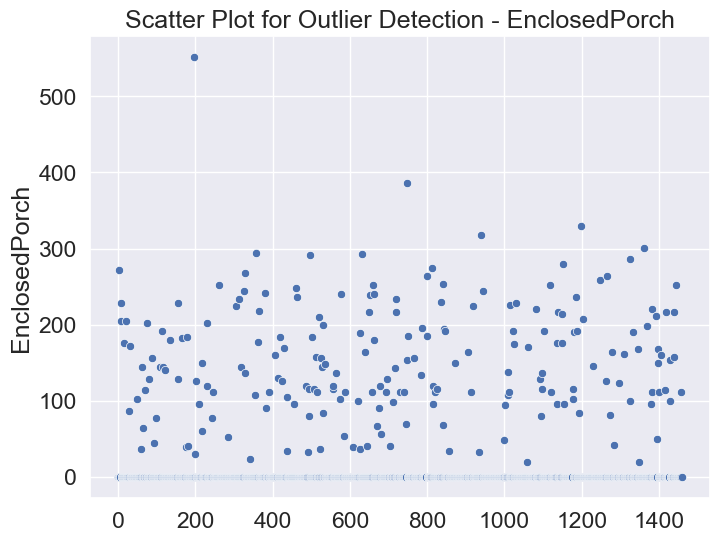

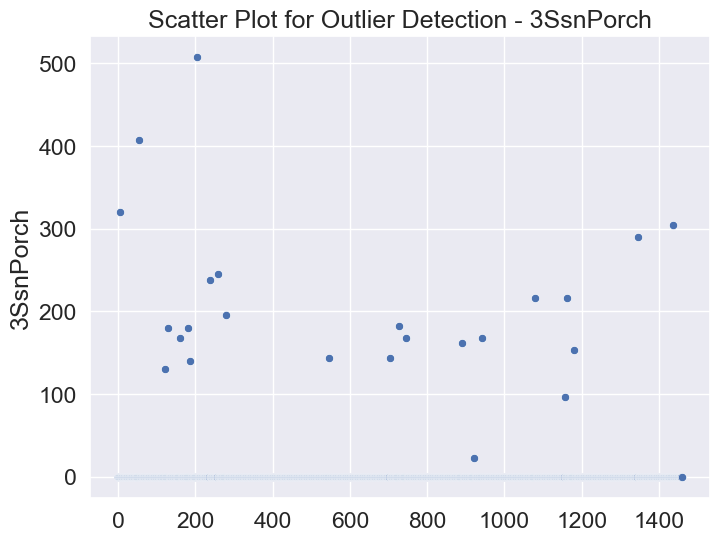

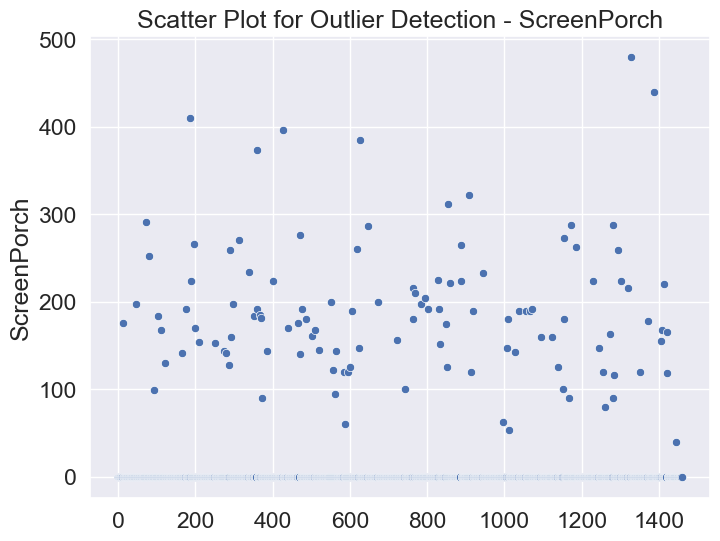

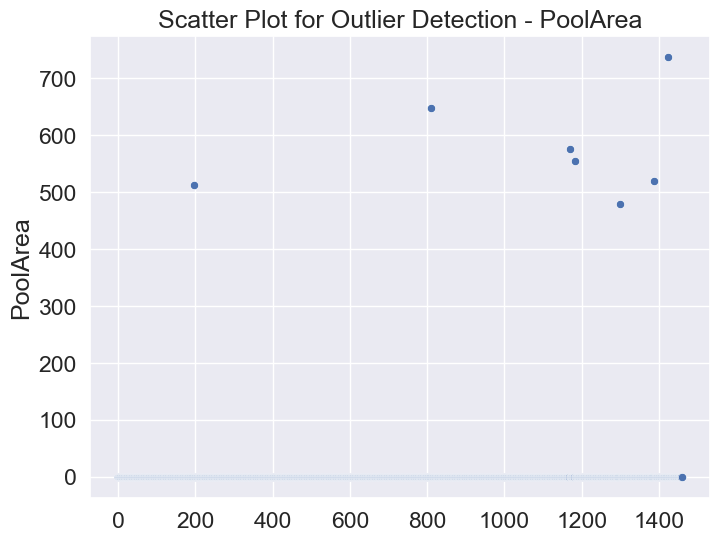

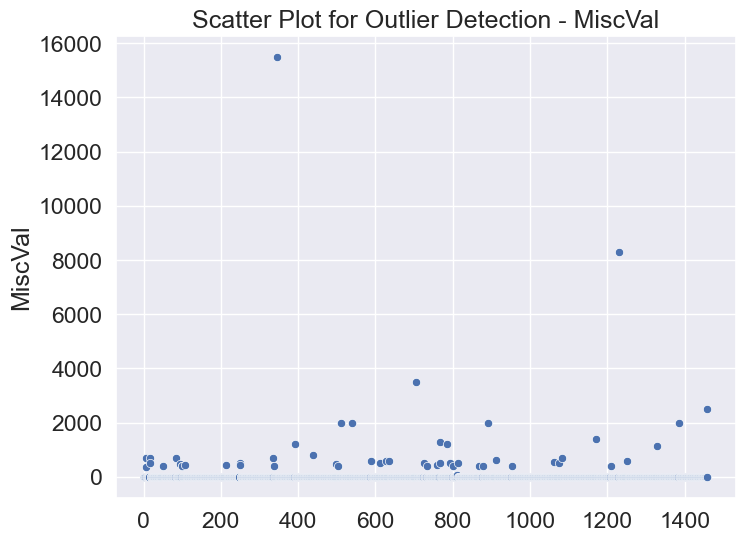

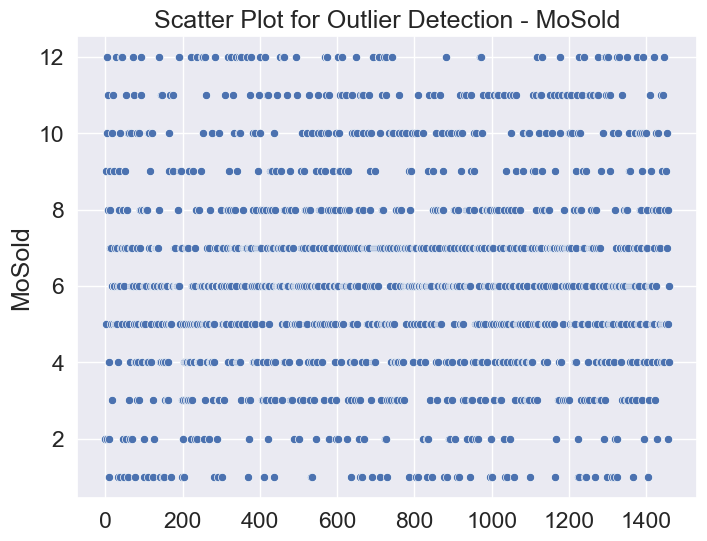

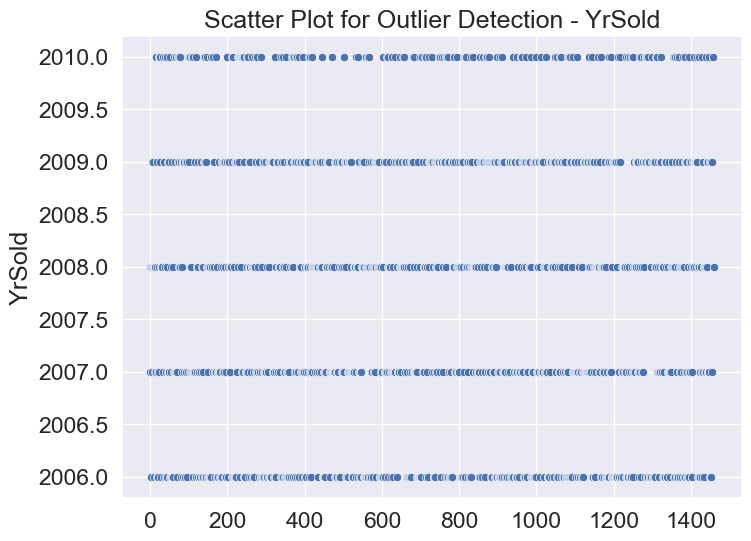

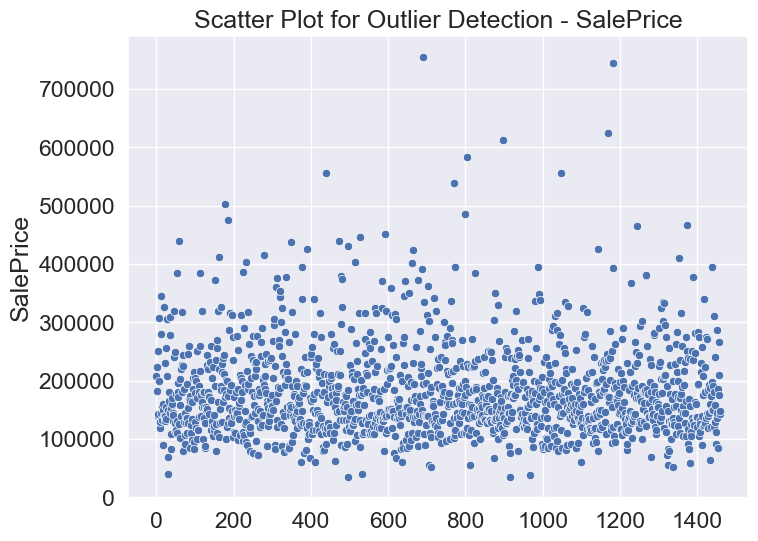

In [38]:
for i in col_list:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_int_features[i])
    plt.title('Scatter Plot for Outlier Detection - '+i)
    plt.show()

# Exploring the Categorical variables

In [99]:
def print_unique_values_by_column(df):
    for i in df.columns:
        unique_vals = df[i].unique()
        print(f"column:{i}")
        print("Unique values:",unique_vals)
        print("-"*40)

In [113]:
print_unique_values_by_column(df_cat_features)

column:MSZoning
Unique values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
----------------------------------------
column:Street
Unique values: ['Pave' 'Grvl']
----------------------------------------
column:Alley
Unique values: [nan 'Grvl' 'Pave']
----------------------------------------
column:LotShape
Unique values: ['Reg' 'IR1' 'IR2' 'IR3']
----------------------------------------
column:LandContour
Unique values: ['Lvl' 'Bnk' 'Low' 'HLS']
----------------------------------------
column:Utilities
Unique values: ['AllPub' 'NoSeWa']
----------------------------------------
column:LotConfig
Unique values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
----------------------------------------
column:LandSlope
Unique values: ['Gtl' 'Mod' 'Sev']
----------------------------------------
column:Neighborhood
Unique values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr'

# Dimensionality reduction using RandomForest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Encode categorical variables
encoded_data = pd.get_dummies(df_cat_features)
target = df_in['SalePrice']

In [103]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(encoded_data, target)

# Extract feature importances
feature_importance = rf.feature_importances_

# Create a DataFrame to view feature importance scores
feature_importance_df = pd.DataFrame({'Feature': encoded_data.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize feature importance
print(feature_importance_df)

                  Feature    Importance
133          ExterQual_TA  3.209771e-01
145           BsmtQual_Ex  1.391637e-01
187        KitchenQual_Ex  5.110668e-02
42   Neighborhood_NoRidge  4.904154e-02
204     GarageType_Attchd  2.447084e-02
..                    ...           ...
18       Utilities_NoSeWa  6.234369e-07
66        Condition2_RRAe  5.151869e-07
92          RoofMatl_Roll  2.561145e-07
17       Utilities_AllPub  8.343020e-08
67        Condition2_RRAn  1.516928e-08

[251 rows x 2 columns]


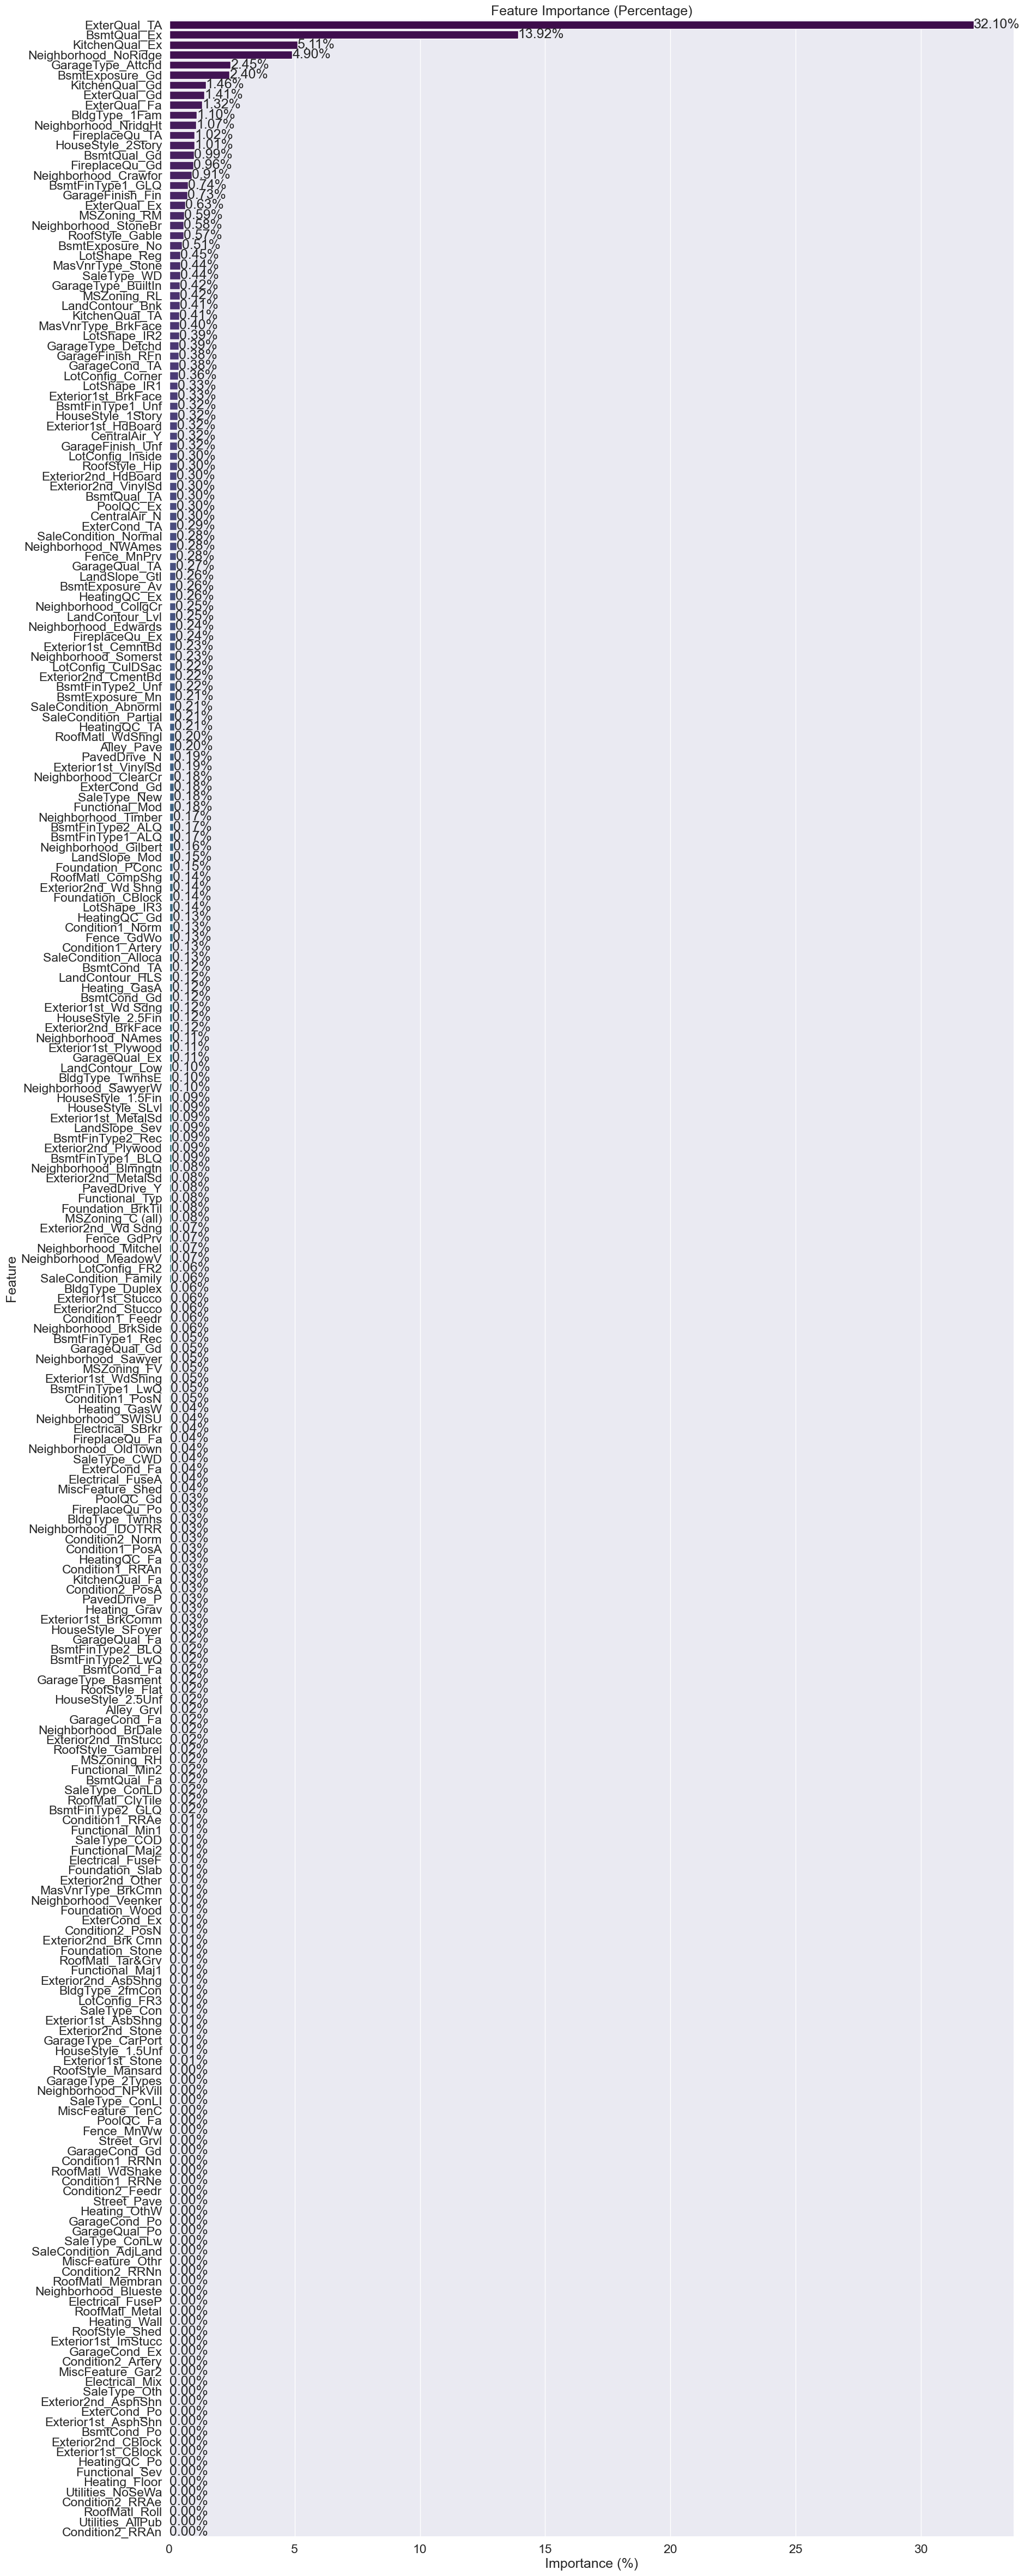

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate total sum of importance scores for normalization
total_importance = feature_importance_df['Importance'].sum()

# Calculate percentages
feature_importance_df['Importance_percent'] = (feature_importance_df['Importance'] / total_importance) * 100

# Sort the feature importance dataframe 
feature_importance_df = feature_importance_df.sort_values(by='Importance_percent', ascending=False)

# Create a bar plot for feature importance
plt.figure(figsize=(20, 60))
sns.barplot(x='Importance_percent', y='Feature', data=feature_importance_df, palette='viridis')

# Add percentage values on top of the bars
for index, value in enumerate(feature_importance_df['Importance_percent']):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center')

plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Feature Importance (Percentage)')
plt.show()


In [109]:
selected_features = feature_importance_df[feature_importance_df['Importance_percent'] > 0.5]['Feature'].tolist()

In [110]:
print(selected_features)

['ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'GarageType_Attchd', 'BsmtExposure_Gd', 'KitchenQual_Gd', 'ExterQual_Gd', 'ExterQual_Fa', 'BldgType_1Fam', 'Neighborhood_NridgHt', 'FireplaceQu_TA', 'HouseStyle_2Story', 'BsmtQual_Gd', 'FireplaceQu_Gd', 'Neighborhood_Crawfor', 'BsmtFinType1_GLQ', 'GarageFinish_Fin', 'ExterQual_Ex', 'MSZoning_RM', 'Neighborhood_StoneBr', 'RoofStyle_Gable', 'BsmtExposure_No']


In [111]:
##columns of interest
print(df_cat_features.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [44]:
cat_cols_of_interest = ['ExterQual','BsmtQual','Neighborhood','GarageType','ExterQual','BsmtExposure','BsmtQual','BldgType','KitchenQual','HouseStyle']

# Feature selection

In [105]:
## Choosing features for the models
print("Quantitative features highly correlated with SalePrice")
print(high_corr_features)

Quantitative features highly correlated with SalePrice
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


In [106]:
print("Features with high variance in PCA")
print(pc1_high_var_features)
print(pc2_high_var_features)

Features with high variance in PCA
        features       PC1
3    OverallQual  0.263813
5      YearBuilt  0.350037
6   YearRemodAdd  0.618875
17      FullBath  0.273068
18      HalfBath  0.241542
23    GarageCars  0.287293
24    GarageArea  0.210768
   features       PC2
33   YrSold  0.923863


In [108]:
print("Categorical features with high importance in the Random forest model")
print(cat_cols_of_interest)

Categorical features with high importance in the Random forest model
['ExterQual', 'BsmtQual', 'Neighborhood', 'GarageType', 'ExterQual', 'BsmtExposure', 'BsmtQual', 'BldgType', 'KitchenQual', 'HouseStyle']


In [110]:
final_feature_list = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'YrSold',
                'ExterQual', 'BsmtQual', 'Neighborhood', 'GarageType', 
                'ExterQual', 'BsmtExposure', 'BsmtQual', 'BldgType', 
                'KitchenQual', 'HouseStyle']

# Imputations and final dataset for model implementation

In [112]:
df_in = pd.read_csv('train.csv')

In [114]:
feature_list = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'YrSold',
                'ExterQual', 'Neighborhood', 'GarageType', 
                'ExterQual', 'BsmtExposure', 'BsmtQual', 'BldgType', 
                'KitchenQual', 'HouseStyle']
df_model = df_in[feature_list]
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   YearBuilt     1460 non-null   int64 
 2   YearRemodAdd  1460 non-null   int64 
 3   BsmtFinSF1    1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   2ndFlrSF      1460 non-null   int64 
 7   GrLivArea     1460 non-null   int64 
 8   BsmtFullBath  1460 non-null   int64 
 9   FullBath      1460 non-null   int64 
 10  HalfBath      1460 non-null   int64 
 11  BedroomAbvGr  1460 non-null   int64 
 12  TotRmsAbvGrd  1460 non-null   int64 
 13  GarageCars    1460 non-null   int64 
 14  GarageArea    1460 non-null   int64 
 15  YrSold        1460 non-null   int64 
 16  ExterQual     1460 non-null   object
 17  Neighborhood  1460 non-null   object
 18  GarageType    1379 non-null   object
 19  ExterQ

<Axes: >

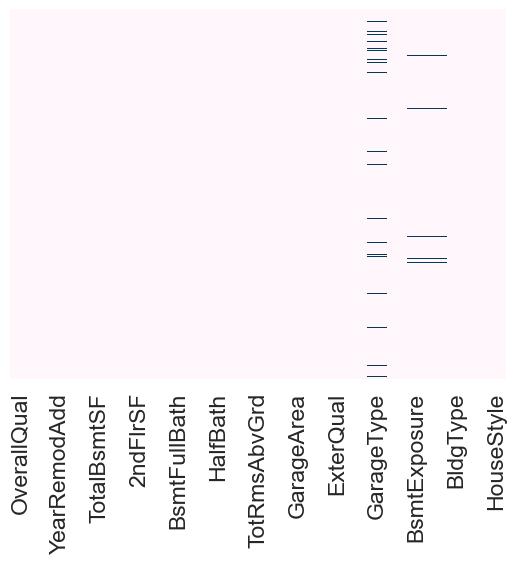

In [115]:
sns.heatmap(df_model.isnull(),yticklabels=False,cbar=False,cmap='PuBu') #imputed all missing values

In [116]:
df_model['BsmtQual'].fillna(df_model['BsmtQual'].mode()[0], inplace=True)
df_model['GarageType'].fillna(df_model['GarageType'].mode()[0], inplace=True)
df_model['BsmtExposure'].fillna(df_model['BsmtExposure'].mode()[0], inplace=True)

<Axes: >

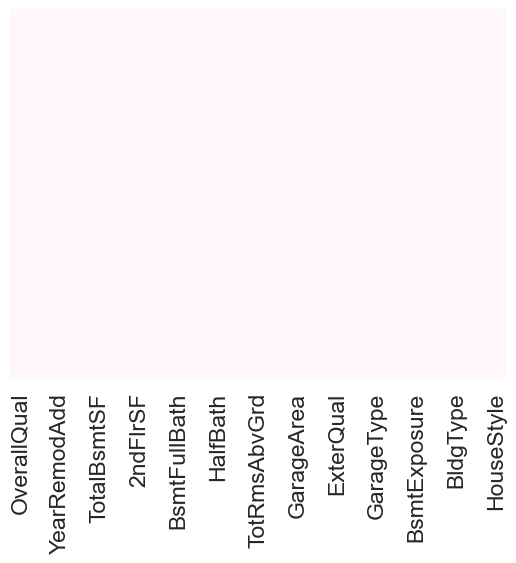

In [117]:
sns.heatmap(df_model.isnull(),yticklabels=False,cbar=False,cmap='PuBu') #imputed all missing values

In [118]:
categorical_columns = list(df_model.select_dtypes(include=['object']).columns)
print(categorical_columns)

['ExterQual', 'Neighborhood', 'GarageType', 'ExterQual', 'BsmtExposure', 'BsmtQual', 'BldgType', 'KitchenQual', 'HouseStyle']


In [119]:
for column in categorical_columns:
    # Apply one-hot encoding to the current column and concatenate the result with the original DataFrame
    df_model = pd.concat([df_model, pd.get_dummies(df_model[column], prefix=column)], axis=1)

# Drop the original categorical columns since they are now one-hot encoded
df_model = df_model.drop(categorical_columns, axis=1)


In [125]:
selected_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 
                     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                    'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                    'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'YrSold',
                     'ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex', 
                     'Neighborhood_NoRidge', 'GarageType_Attchd', 
                     'BsmtExposure_Gd', 'KitchenQual_Gd', 'ExterQual_Gd', 
                     'ExterQual_Fa', 'BldgType_1Fam', 'Neighborhood_NridgHt', 
                     'BsmtQual_Gd', 'ExterQual_Ex', 'BsmtExposure_No']

In [128]:
df_final = df_model[selected_features]
# Save the DataFrame to a CSV file
df_final.to_csv('df_final.csv', index=False)